# 

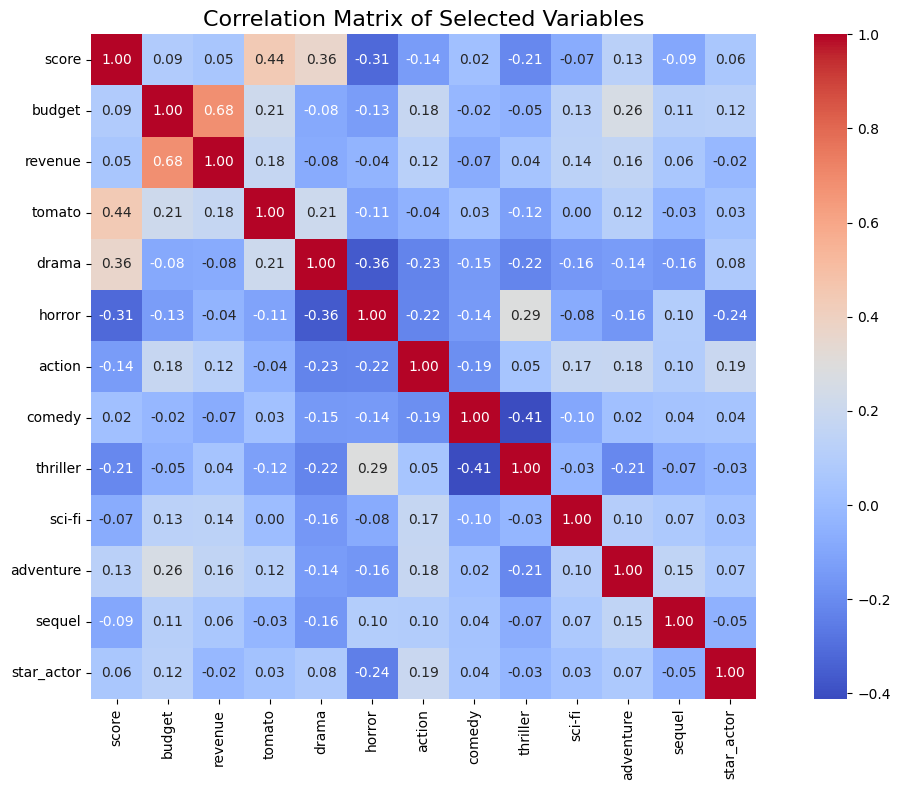

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to include in the correlation matrix
variables = ['score', 'budget', 'revenue', 'tomato', 'drama', 'horror', 
             'action', 'comedy', 'thriller', 'sci-fi', 'adventure', 'sequel', 'star_actor']

# Filter the dataset to include only the specified variables
filtered_data = data20_cleaned[variables]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Selected Variables', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


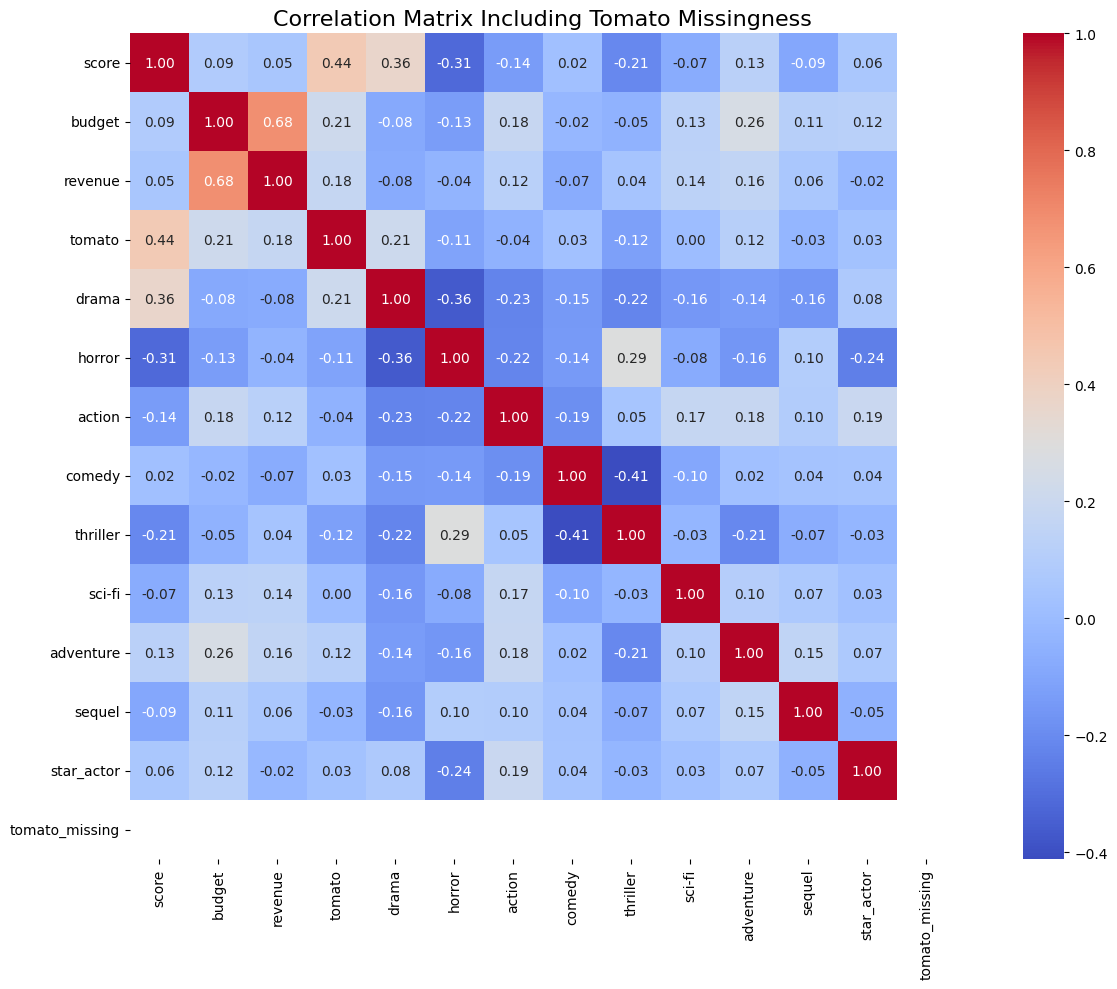

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Add 'tomato_missing' column to the dataset
data20_cleaned['tomato_missing'] = data20_cleaned['tomato'].isnull().astype(int)

# List of variables for the updated correlation matrix
variables_with_missing = ['score', 'budget', 'revenue', 'tomato', 'drama', 'horror', 
                          'action', 'comedy', 'thriller', 'sci-fi', 'adventure', 
                          'sequel', 'star_actor', 'tomato_missing']

# Filter the dataset for the selected variables
filtered_data_with_missing = data20_cleaned[variables_with_missing]

# Compute the updated correlation matrix
correlation_matrix_with_missing = filtered_data_with_missing.corr()

# Plot the updated correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_with_missing, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Including Tomato Missingness', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


In [27]:
# Install required libraries (if not already installed)
!pip install pandas numpy statsmodels matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load dataset
# Import the necessary library
import pandas as pd

# Load the dataset
file_path = "C:/Users/AngelikiLoulo/Downloads/data20_cleaned.csv"
data20_cleaned = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(data20_cleaned.head())
data20_cleaned=data



  release_date  score                                           overview  \
0     4/5/2023     76  while working underground to fix a water main,...   
1    3/17/2023     61  good-hearted teenager william always lived in ...   
2    1/13/2023     65  the hottest biotech company in the world has d...   
3    2/25/2004     74  a graphic portrayal of the last twelve hours o...   
4    2/10/2023     65  after the alleged suicide of her priest brothe...   

                                                crew  \
0  chris pratt, mario (voice), anya taylor-joy, p...   
1  skeet ulrich, roy cameron, anne heche, dr quin...   
2  alice orr-ewing, laura, joe doyle, father marc...   
3  jim caviezel, jesus, maia morgenstern, maria, ...   
4  jena malone, grace, danny huston, father romer...   

                         title orig_lang     budget      revenue country  \
0  the super mario bros. movie   english  100000000  724459031.0      au   
1                    supercell   english   77000000  3

In [29]:
import pandas as pd

# Load the dataset into a DataFrame
data20_cleaned = pd.read_csv("C:/Users/AngelikiLoulo/Downloads/data20_cleaned.csv")


In [40]:
data20_cleaned = data

In [41]:
data20_cleaned = data


In [32]:
import pandas as pd

# Load the dataset into a DataFrame and name it 'data'
data = pd.read_csv("C:/Users/AngelikiLoulo/Downloads/data20_cleaned.csv")

# Display the first few rows to confirm successful loading
print(data.head())


  release_date  score                                           overview  \
0     4/5/2023     76  while working underground to fix a water main,...   
1    3/17/2023     61  good-hearted teenager william always lived in ...   
2    1/13/2023     65  the hottest biotech company in the world has d...   
3    2/25/2004     74  a graphic portrayal of the last twelve hours o...   
4    2/10/2023     65  after the alleged suicide of her priest brothe...   

                                                crew  \
0  chris pratt, mario (voice), anya taylor-joy, p...   
1  skeet ulrich, roy cameron, anne heche, dr quin...   
2  alice orr-ewing, laura, joe doyle, father marc...   
3  jim caviezel, jesus, maia morgenstern, maria, ...   
4  jena malone, grace, danny huston, father romer...   

                         title orig_lang     budget      revenue country  \
0  the super mario bros. movie   english  100000000  724459031.0      au   
1                    supercell   english   77000000  3

In [42]:
# Log-transform variables for normalization
data['log_revenue'] = np.log(data['revenue'] + 1)
data['log_budget'] = np.log(data['budget_x'] + 1)


KeyError: 'budget_x'

In [43]:
print(data.columns)


Index(['release_date', 'score', 'overview', 'crew', 'title', 'orig_lang',
       'budget', 'revenue', 'country', 'tomato', 'rating', 'ratingContents',
       'genre', 'drama', 'horror', 'action', 'comedy', 'thriller', 'sci-fi',
       'adventure', 'director', 'sequel', 'month', 'summer', 'christmas',
       'new_years_eve', 'Thanksgiving_season', 'Easter', 'Halloween',
       'Valentine's', 'Holiday', 'star_actor', 'tomato_missing',
       'log_revenue'],
      dtype='object')


In [24]:
# Create interaction terms for holiday effects
data['holiday_budget'] = data['Holiday'] * data['log_budget']
data['holiday_star_actor'] = data['Holiday'] * data['star_actor']
data['holiday_score'] = data['Holiday'] * data['score']
data['holiday_tomato'] = data['Holiday'] * data['tomato']

KeyError: 'log_budget'

In [44]:
import numpy as np

# Log-transform variables for normalization
data['log_revenue'] = np.log(data['revenue'] + 1)
data['log_budget'] = np.log(data['budget'] + 1)


In [45]:
# Control variables (genres and sequel)
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

In [46]:
#1. Baseline Model (No Holiday Effects)

In [47]:
# Define predictors and dependent variable
X_baseline = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score'] + control_vars])
y_baseline = data['log_revenue']

# Fit the model
baseline_model = sm.OLS(y_baseline, X_baseline).fit()
print(baseline_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     37.24
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           8.31e-68
Time:                        02:55:36   Log-Likelihood:                -1615.5
No. Observations:                 745   AIC:                             3257.
Df Residuals:                     732   BIC:                             3317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5593      1.114     -2.297      0.0

In [48]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable
X_baseline = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score'] + control_vars])
y_baseline = data['log_revenue']

# Fit the model
baseline_model = sm.OLS(y_baseline, X_baseline).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': baseline_model.params.index,  # Variable names
    'Coef.': baseline_model.params.values,    # Coefficients
    'Std.Err': baseline_model.bse.values,     # Standard errors
    't-value': baseline_model.tvalues.values, # t-statistics
    'p-value': baseline_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            baseline_model.nobs,               # Observations
            baseline_model.rsquared,           # R-Squared
            baseline_model.rsquared_adj,       # Adjusted R-Squared
            baseline_model.aic,                # AIC
            baseline_model.bic,                # BIC
            baseline_model.llf,                # Log-Likelihood
            baseline_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, baseline_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if baseline_model.f_pvalue < 0.01 else '**' if baseline_model.f_pvalue < 0.05 else '*' if baseline_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("regression_table_full.csv", index=False)

# Display the table as formatted text (optional)
print("\nRegression Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Combined regression table with Log-Likelihood saved to 'regression_table_full.csv'.")



Regression Coefficients Table:
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+==============+=============+===============+========+
|  0 | const              |    -2.55925    |   1.11431    |  -2.29672   |   0.0219164   | **     |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |     1.10157    |   0.0546412  |  20.1601    |   3.12544e-72 | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |    -0.510456   |   0.17818    |  -2.86483   |   0.00429184  | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  3 | tomato             |    -0.00737735 |   0.00341857 |  -2.15802   |   0

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_20428\3090394583.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#2. Holiday Model

In [50]:
# Define predictors for the holiday model
X_holiday1 = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score', 
                                  'holiday_budget', 'holiday_star_actor', 'holiday_score', 'holiday_tomato'] + control_vars])
y_holiday1 = data['log_revenue']

# Fit the model
holiday1_model = sm.OLS(y_holiday1, X_holiday1).fit()
print(holiday1_model.summary())


KeyError: "['holiday_budget', 'holiday_star_actor', 'holiday_score', 'holiday_tomato'] not in index"

In [51]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors for the holiday model
X_holiday1 = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score', 
                                   'holiday_budget', 'holiday_star_actor', 'holiday_score', 'holiday_tomato'] + control_vars])
y_holiday1 = data['log_revenue']

# Fit the holiday model
holiday1_model = sm.OLS(y_holiday1, X_holiday1).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': holiday1_model.params.index,  # Variable names
    'Coef.': holiday1_model.params.values,    # Coefficients
    'Std.Err': holiday1_model.bse.values,     # Standard errors
    't-value': holiday1_model.tvalues.values, # t-statistics
    'p-value': holiday1_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            holiday1_model.nobs,               # Observations
            holiday1_model.rsquared,           # R-Squared
            holiday1_model.rsquared_adj,       # Adjusted R-Squared
            holiday1_model.aic,                # AIC
            holiday1_model.bic,                # BIC
            holiday1_model.llf,                # Log-Likelihood
            holiday1_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, holiday1_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if holiday1_model.f_pvalue < 0.01 else '**' if holiday1_model.f_pvalue < 0.05 else '*' if holiday1_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("holiday_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nHoliday Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Holiday model regression table saved to 'holiday_model_table.csv'.")


KeyError: "['holiday_budget', 'holiday_star_actor', 'holiday_score', 'holiday_tomato'] not in index"

In [39]:
#2THIS#### Filter data for Holiday = 1
data_holiday = data[data['Holiday'] == 1]

# Define predictors
X_holiday = sm.add_constant(data_holiday[['log_budget', 'star_actor', 'tomato', 'score', 
                                          'holiday_budget', 'holiday_star_actor', 
                                          'holiday_score', 'holiday_tomato'] + control_vars])
y_holiday = data_holiday['log_revenue']

# Fit the model
holiday_model = sm.OLS(y_holiday, X_holiday).fit()
print(holiday_model.summary())


KeyError: "['log_budget', 'holiday_budget', 'holiday_star_actor', 'holiday_score', 'holiday_tomato'] not in index"

In [481]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Filter holiday data
data_holiday = data[data['Holiday'] == 1]

# Define predictors for the holiday model
X_holiday = sm.add_constant(data_holiday[['log_budget', 'star_actor', 'tomato', 'score', 
                                          'holiday_budget', 'holiday_star_actor', 
                                          'holiday_score', 'holiday_tomato'] + control_vars])
y_holiday = data_holiday['log_revenue']

# Fit the holiday model
holiday_model = sm.OLS(y_holiday, X_holiday).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': holiday_model.params.index,  # Variable names
    'Coef.': holiday_model.params.values,    # Coefficients
    'Std.Err': holiday_model.bse.values,     # Standard errors
    't-value': holiday_model.tvalues.values, # t-statistics
    'p-value': holiday_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            holiday_model.nobs,               # Observations
            holiday_model.rsquared,           # R-Squared
            holiday_model.rsquared_adj,       # Adjusted R-Squared
            holiday_model.aic,                # AIC
            holiday_model.bic,                # BIC
            holiday_model.llf,                # Log-Likelihood
            holiday_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, holiday_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if holiday_model.f_pvalue < 0.01 else '**' if holiday_model.f_pvalue < 0.05 else '*' if holiday_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("holiday_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nHoliday Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Holiday model regression table saved to 'holiday_model_table.csv'.")



Holiday Model Coefficients Table:
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+==============+=============+===============+========+
|  0 | const              |    0.766738    |   1.72614    |   0.444193  |   0.657229    |        |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |    0.47695     |   0.0419789  |  11.3617    |   4.68548e-25 | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |   -0.429547    |   0.147814   |  -2.90599   |   0.00393823  | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  3 | tomato             |   -0.000876189 |   0.00283052 |  -0.30955   | 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3769721826.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#2. Non-Holiday Model (Holiday = 0)

In [396]:
# Filter data for Holiday = 0
data_non_holiday = data[data['Holiday'] == 0]

# Define predictors
X_non_holiday = sm.add_constant(data_non_holiday[['log_budget', 'star_actor', 'tomato', 'score'] + control_vars])
y_non_holiday = data_non_holiday['log_revenue']

# Fit the model
non_holiday_model = sm.OLS(y_non_holiday, X_non_holiday).fit()
print(non_holiday_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     28.46
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           2.83e-47
Time:                        23:37:58   Log-Likelihood:                -921.46
No. Observations:                 437   AIC:                             1869.
Df Residuals:                     424   BIC:                             1922.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2772      1.474     -3.581      0.0

In [482]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Filter non-holiday data
data_non_holiday = data[data['Holiday'] == 0]

# Define predictors for the non-holiday model
X_non_holiday = sm.add_constant(data_non_holiday[['log_budget', 'star_actor', 'tomato', 'score'] + control_vars])
y_non_holiday = data_non_holiday['log_revenue']

# Fit the non-holiday model
non_holiday_model = sm.OLS(y_non_holiday, X_non_holiday).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': non_holiday_model.params.index,  # Variable names
    'Coef.': non_holiday_model.params.values,    # Coefficients
    'Std.Err': non_holiday_model.bse.values,     # Standard errors
    't-value': non_holiday_model.tvalues.values, # t-statistics
    'p-value': non_holiday_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            non_holiday_model.nobs,               # Observations
            non_holiday_model.rsquared,           # R-Squared
            non_holiday_model.rsquared_adj,       # Adjusted R-Squared
            non_holiday_model.aic,                # AIC
            non_holiday_model.bic,                # BIC
            non_holiday_model.llf,                # Log-Likelihood
            non_holiday_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, non_holiday_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if non_holiday_model.f_pvalue < 0.01 else '**' if non_holiday_model.f_pvalue < 0.05 else '*' if non_holiday_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("non_holiday_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nNon-Holiday Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Non-holiday model regression table saved to 'non_holiday_model_table.csv'.")



Non-Holiday Model Coefficients Table:
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|    | Variable           |        Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+==============+==============+=============+===============+========+
|  0 | const              |   -5.2772    |   1.47384    |  -3.58059   |   0.000382505 | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |    1.22236   |   0.0727994  |  16.7908    |   7.07813e-49 | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |   -0.359694  |   0.223675   |  -1.60811   |   0.108555    |        |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  3 | tomato             |   -0.0127741 |   0.00426442 |  -2.99551   |   0.00290049  | 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\353899622.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Combined Holiday Interaction Model

In [ ]:
#This model includes all observations and interaction terms for holiday effects, which allow you to assess whether predictors behave differently during holiday periods

In [398]:
# Define predictors
X_combined = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score', 'Holiday', 
                                   'holiday_budget', 'holiday_star_actor', 
                                   'holiday_score', 'holiday_tomato'] + control_vars])
y_combined = data['log_revenue']

# Fit the model
combined_model = sm.OLS(y_combined, X_combined).fit()
print(combined_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     27.70
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.69e-67
Time:                        23:38:15   Log-Likelihood:                -1606.9
No. Observations:                 745   AIC:                             3250.
Df Residuals:                     727   BIC:                             3333.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.5798      1

In [484]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors for the combined model
X_combined = sm.add_constant(data[['log_budget', 'star_actor', 'tomato', 'score', 'Holiday', 
                                   'holiday_budget', 'holiday_star_actor', 
                                   'holiday_score', 'holiday_tomato'] + control_vars])
y_combined = data['log_revenue']

# Fit the combined model
combined_model = sm.OLS(y_combined, X_combined).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': combined_model.params.index,  # Variable names
    'Coef.': combined_model.params.values,    # Coefficients
    'Std.Err': combined_model.bse.values,     # Standard errors
    't-value': combined_model.tvalues.values, # t-statistics
    'p-value': combined_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            combined_model.nobs,               # Observations
            combined_model.rsquared,           # R-Squared
            combined_model.rsquared_adj,       # Adjusted R-Squared
            combined_model.aic,                # AIC
            combined_model.bic,                # BIC
            combined_model.llf,                # Log-Likelihood
            combined_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, combined_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if combined_model.f_pvalue < 0.01 else '**' if combined_model.f_pvalue < 0.05 else '*' if combined_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("combined_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nCombined Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Combined model regression table saved to 'combined_model_table.csv'.")



Combined Model Coefficients Table:
+----+--------------------+-----------------+--------------+--------------+---------------+--------+
|    | Variable           |           Coef. |      Std.Err |      t-value |       p-value | Sig.   |
+====+====================+=================+==============+==============+===============+========+
|  0 | const              |    -5.57982     |   1.49115    |  -3.74196    |   0.000196984 | ***    |
+----+--------------------+-----------------+--------------+--------------+---------------+--------+
|  1 | log_budget         |     1.25305     |   0.0741923  |  16.8892     |   3.0962e-54  | ***    |
+----+--------------------+-----------------+--------------+--------------+---------------+--------+
|  2 | star_actor         |    -0.25744     |   0.229394   |  -1.12226    |   0.262123    |        |
+----+--------------------+-----------------+--------------+--------------+---------------+--------+
|  3 | tomato             |    -0.0125103   |   0.00443

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2668747161.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [366]:
#Step 3: Compare the Models
#Effect Sizes

In [367]:
#Extract and compare the coefficients for each variable between the Holiday Model and Non-Holiday

In [399]:
# Print coefficients for comparison
print("Holiday Model Coefficients:")
print(holiday_model.params)

print("\nNon-Holiday Model Coefficients:")
print(non_holiday_model.params)

Holiday Model Coefficients:
const                 0.766738
log_budget            0.476950
star_actor           -0.429547
tomato               -0.000876
score                 0.005932
holiday_budget        0.476950
holiday_star_actor   -0.429547
holiday_score         0.005932
holiday_tomato       -0.000876
action               -0.621880
adventure            -0.017949
sci-fi                0.289178
drama                -0.118086
comedy               -0.278033
thriller             -0.263167
horror                0.656005
sequel                0.225246
dtype: float64

Non-Holiday Model Coefficients:
const        -5.277203
log_budget    1.222358
star_actor   -0.359694
tomato       -0.012774
score         0.031085
action       -0.207624
adventure     0.020553
sci-fi        0.547939
drama         0.305148
comedy        0.210371
thriller      0.493294
horror        0.051842
sequel        0.639800
dtype: float64


In [ ]:
#Adjusted R²
#Compare how well each model explains variance in the dependent variable:

In [485]:
print("Adjusted R²:")
print(f"Holiday Model: {holiday_model.rsquared_adj}")
print(f"Non-Holiday Model: {non_holiday_model.rsquared_adj}")
print("Adjusted R²:")
print(f"Baseline Modell: {baseline_model.rsquared_adj}")
print(f"Combined Model: {combined_model.rsquared_adj}")


Adjusted R²:
Holiday Model: 0.30643594379052264
Non-Holiday Model: 0.43041328681764224
Adjusted R²:
Baseline Modell: 0.3688627228252437
Combined Model: 0.37892228011527895


In [401]:
#AIC/BIC
#Compare the AIC and BIC values for model fit:

In [65]:
print("AIC/BIC Comparison:")
print(f"Holiday Model AIC: {holiday_model.aic}, BIC: {holiday_model.bic}")
print(f"Non-Holiday Model AIC: {non_holiday_model.aic}, BIC: {non_holiday_model.bic}")
print(f"Baseline AIC: {baseline_model.aic}, BIC: {baseline_model.bic}")
print(f"Combined Model AIC: {combined_model.aic}, BIC: {combined_model.bic}")


AIC/BIC Comparison:
Holiday Model AIC: 1385.5185201399956, BIC: 1434.009817318652
Non-Holiday Model AIC: 1868.9171281251145, BIC: 1921.956259661357
Baseline AIC: 3256.963872617495, BIC: 3316.937867456429
Combined Model AIC: 3249.887576111705, BIC: 3332.928492042537


In [66]:
#Holiday Model (Holiday = 1) provides insights into how predictors affect box office revenue during high-peak seasons.
#Non-Holiday Model (Holiday = 0) isolates the effects during non-holiday periods.
#Combined Model tests whether holiday-specific interaction terms (e.g., holiday_budget) are significant.

In [67]:
#3Focus on Interaction Effects:
#If interaction terms like holiday_budget, holiday_score, or holiday_tomato are significant in the Combined Model, it suggests that the effects of those predictors are moderated by the holiday season.

In [68]:
#Step 5: Assumptions

In [69]:
#Linearity

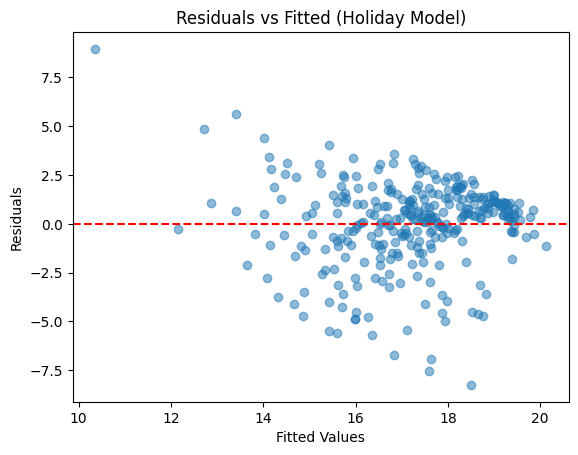

In [70]:
# Residuals vs Fitted Values Plot for Holiday Model
plt.scatter(holiday_model.fittedvalues, holiday_model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Holiday Model)')
plt.show()


In [71]:
# Residuals vs Fitted Values Plot for Holiday Model

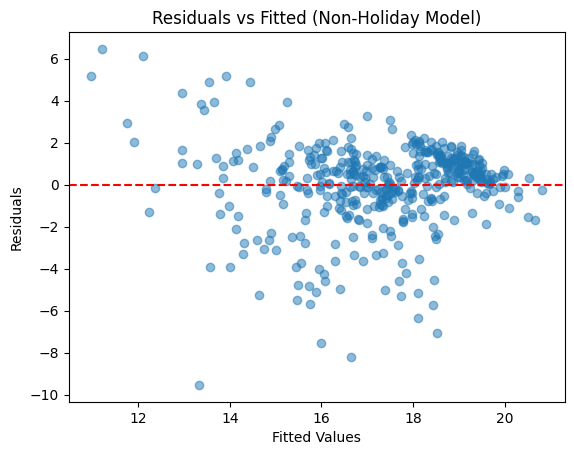

In [72]:
# Residuals vs Fitted Values Plot for Holiday Model
plt.scatter(non_holiday_model.fittedvalues, non_holiday_model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Non-Holiday Model)')
plt.show()

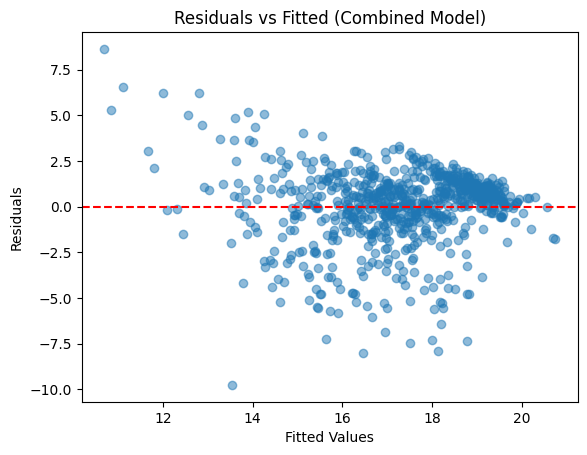

In [73]:
# Residuals vs Fitted Values Plot for Holiday Model
plt.scatter(combined_model.fittedvalues, combined_model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Combined Model)')
plt.show()

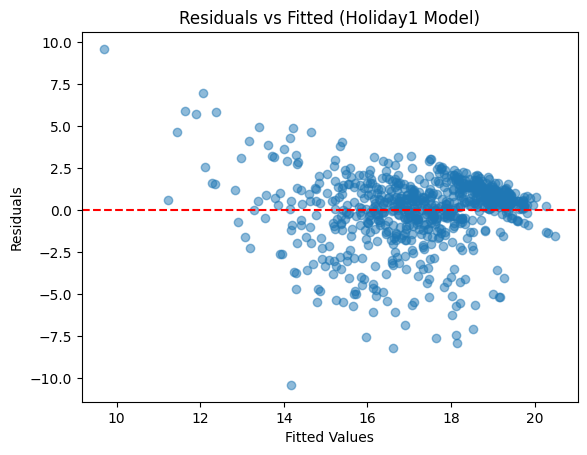

In [74]:
# Residuals vs Fitted Values Plot for Holiday Model 1
plt.scatter(holiday1_model.fittedvalues, holiday1_model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Holiday1 Model)')
plt.show()

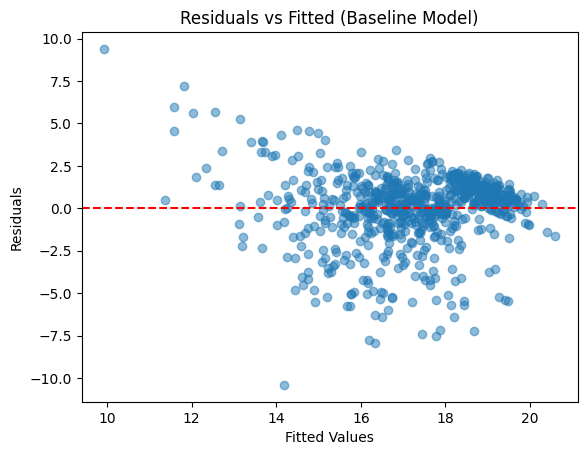

In [75]:
# Residuals vs Fitted Values Plot for Baseline Model
plt.scatter(baseline_model.fittedvalues, baseline_model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Baseline Model)')
plt.show()

In [76]:
#Heteroscedasticity

In [77]:
# Breusch-Pagan test for Holiday Model
bp_test_holiday = het_breuschpagan(holiday_model.resid, X_holiday)
print("Breusch-Pagan Test for Holiday Model:", bp_test_holiday)


Breusch-Pagan Test for Holiday Model: (np.float64(43.71716428293333), np.float64(0.00021774665484603354), np.float64(4.066528267110018), np.float64(7.186900532697718e-06))


In [78]:
# Breusch-Pagan test for Non-Holiday Model
bp_test_non_holiday = het_breuschpagan(non_holiday_model.resid, X_non_holiday)
print("Breusch-Pagan Test for Non-Holiday Model:", bp_test_non_holiday)


Breusch-Pagan Test for Non-Holiday Model: (np.float64(53.02240223507398), np.float64(4.081736704772278e-07), np.float64(4.879082069399508), np.float64(1.4831467665668376e-07))


In [79]:
# Breusch-Pagan test for Combined Model

In [80]:
# Breusch-Pagan test for Combined Model
bp_test_combined = het_breuschpagan(combined_model.resid, X_combined)
print("Breusch-Pagan Test for Combined Model:", bp_test_combined)

Breusch-Pagan Test for Combined Model: (np.float64(84.98783831504822), np.float64(4.92299888594147e-11), np.float64(5.506686270509776), np.float64(9.447814854798884e-12))


In [81]:
# Breusch-Pagan test for Baseline Model

In [82]:
bp_test_baseline = het_breuschpagan(baseline_model.resid, X_baseline)
print("Breusch-Pagan Test for Baseline Model:", bp_test_baseline)

Breusch-Pagan Test for Baseline Model: (np.float64(80.70527408383296), np.float64(3.027390049030649e-12), np.float64(7.4108999018834405), np.float64(5.686605468078069e-13))


In [83]:
# VIF for Holiday Model
vif = pd.DataFrame()
vif["Variable"] = X_holiday.columns[1:]  # Exclude constant
vif["VIF"] = [variance_inflation_factor(X_holiday.values, i) for i in range(1, X_holiday.shape[1])]
print(vif)


              Variable       VIF
0           log_budget       inf
1           star_actor       inf
2               tomato       inf
3                score       inf
4       holiday_budget       inf
5   holiday_star_actor       inf
6        holiday_score       inf
7       holiday_tomato       inf
8               action  1.483335
9            adventure  1.337155
10              sci-fi  1.144403
11               drama  1.933447
12              comedy  1.605830
13            thriller  1.496159
14              horror  1.625684
15              sequel  1.100771


C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [84]:
#Multicollinearity 

In [85]:
# VIF for Non-Holiday Model
vif_non_holiday = calculate_vif(X_non_holiday.drop('const', axis=1))  # Drop constant for VIF calculation
print("VIF for Non-Holiday Model:")
print(vif_non_holiday)


NameError: name 'calculate_vif' is not defined

In [86]:
# Define function to calculate VIF (excluding constant)
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns[1:]  # Exclude constant
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
    return vif

# VIF for Holiday Model
vif_holiday = calculate_vif(X_holiday)
print("VIF for Holiday Model:")
print(vif_holiday)

# VIF for Non-Holiday Model
vif_non_holiday = calculate_vif(X_non_holiday)
print("VIF for Non-Holiday Model:")
print(vif_non_holiday)

# VIF for Baseline Model
vif_baseline = calculate_vif(X_baseline)
print("VIF for Baseline Model:")
print(vif_baseline)

# VIF for Combined Model
vif_combined = calculate_vif(X_combined)
print("VIF for Combined Model:")
print(vif_combined)


VIF for Holiday Model:
              Variable       VIF
0           log_budget       inf
1           star_actor       inf
2               tomato       inf
3                score       inf
4       holiday_budget       inf
5   holiday_star_actor       inf
6        holiday_score       inf
7       holiday_tomato       inf
8               action  1.483335
9            adventure  1.337155
10              sci-fi  1.144403
11               drama  1.933447
12              comedy  1.605830
13            thriller  1.496159
14              horror  1.625684
15              sequel  1.100771
VIF for Non-Holiday Model:
      Variable       VIF
0   log_budget  1.184346
1   star_actor  1.144746
2       tomato  1.274533
3        score  1.488294
4       action  1.430132
5    adventure  1.217711
6       sci-fi  1.096593
7        drama  1.823636
8       comedy  1.576834
9     thriller  1.586395
10      horror  1.765190
11      sequel  1.077298
VIF for Baseline Model:
      Variable       VIF
0   log_budget 

C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [87]:
# VIF for Non-Holiday Model
vif_non_holiday = calculate_vif(X_combined.drop('const', axis=1))  # Drop constant for VIF calculation
print("VIF for Combined Model:")
print(vif_combined

_IncompleteInputError: incomplete input (1035758459.py, line 4)

In [88]:
#Identifying the probles with vifs

In [ ]:
#CORRELATION MAPS

In [445]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Correlation Matrix for Non-Holiday Model


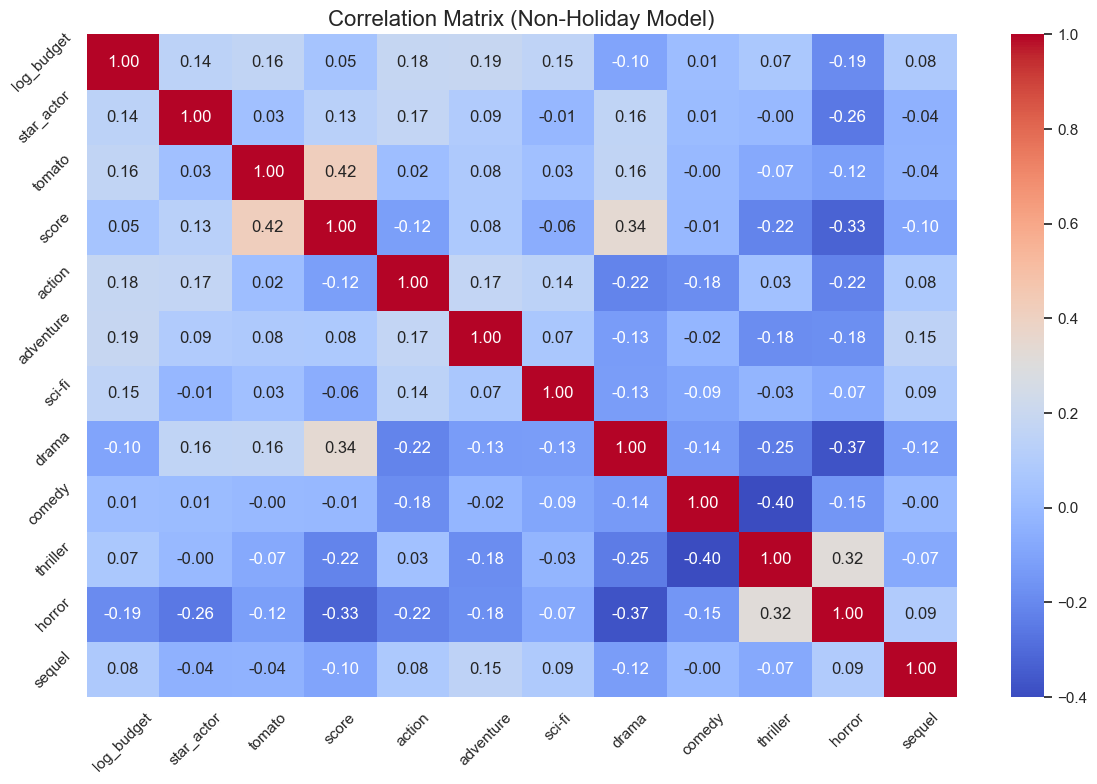

Correlation Matrix for Holiday Model


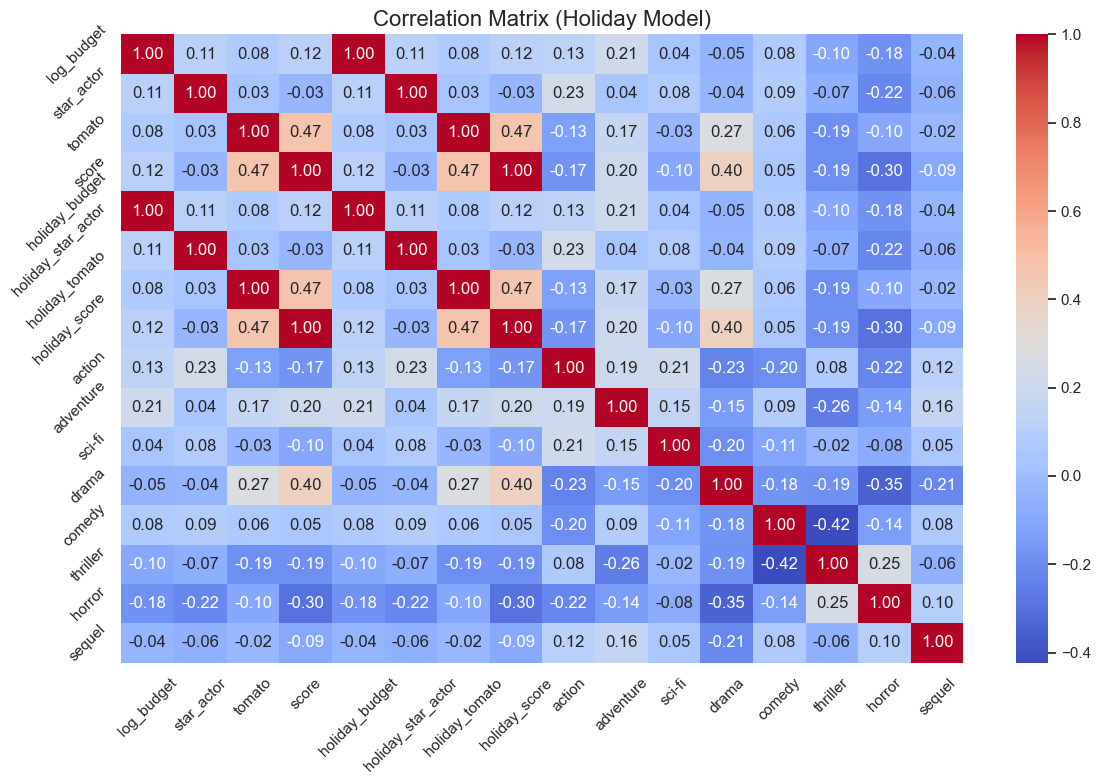

Correlation Matrix for Baseline Model


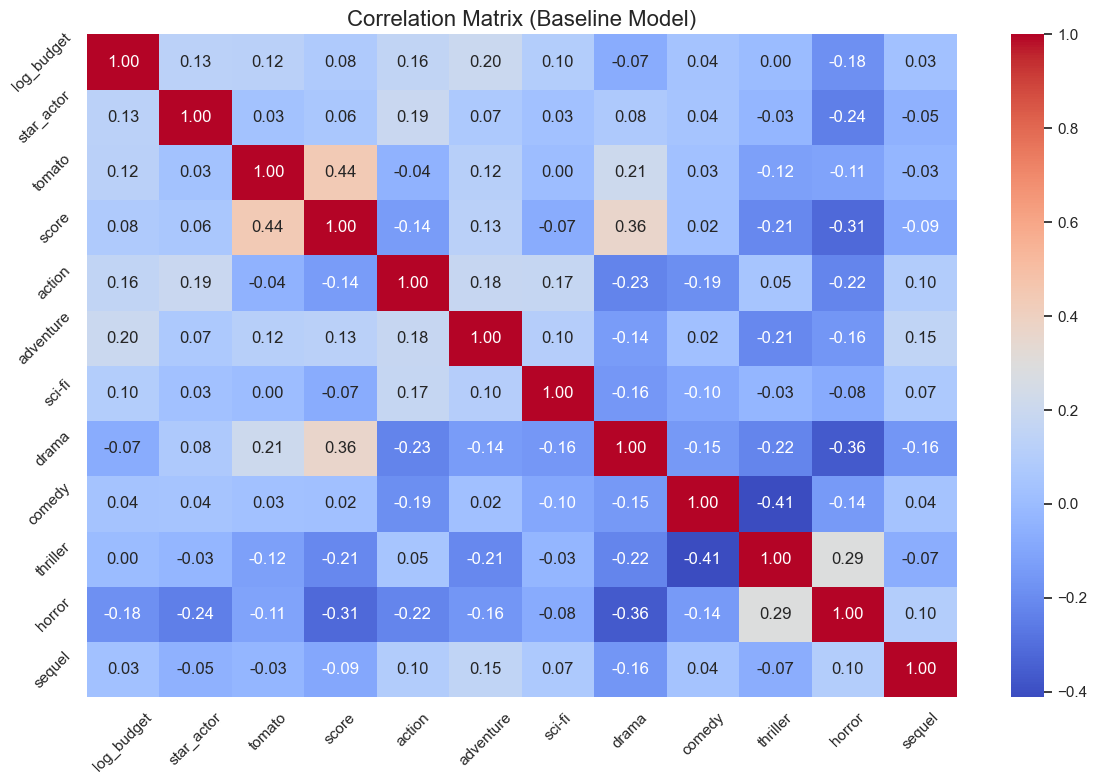

Correlation Matrix for Combined Model


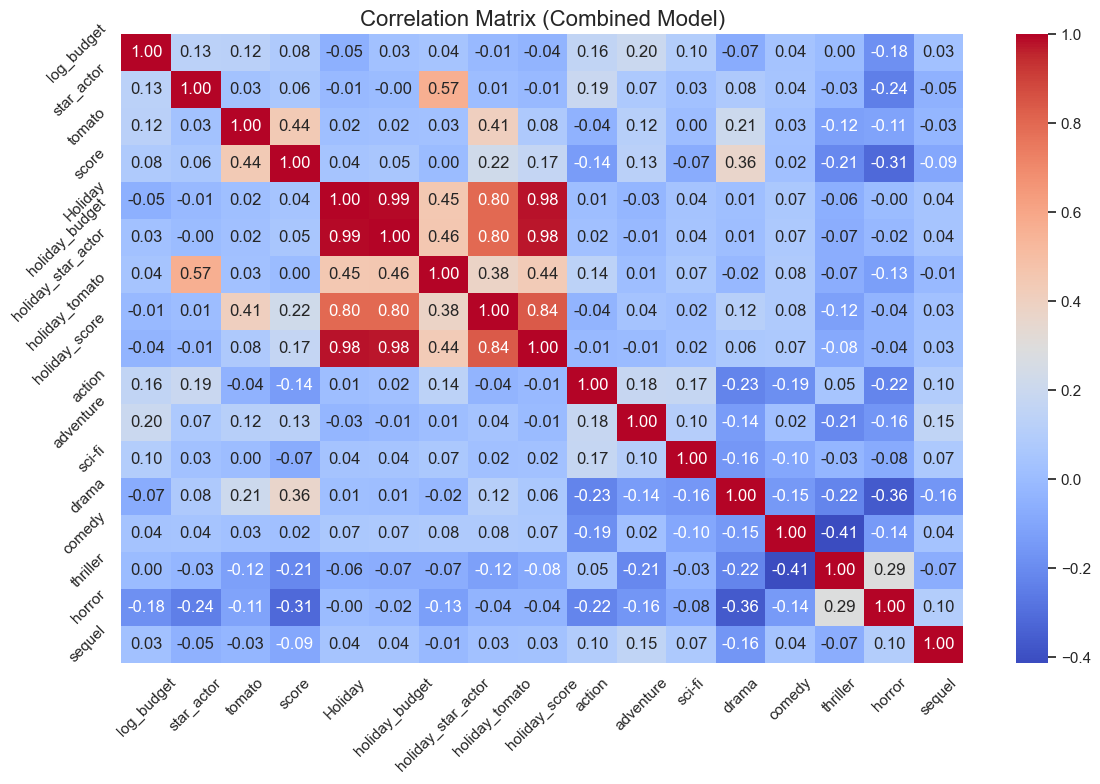

In [451]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your cleaned dataset is loaded as 'data20_cleaned'

# Create interaction terms explicitly
data20_cleaned['holiday_budget'] = data20_cleaned['Holiday'] * data20_cleaned['log_budget']
data20_cleaned['holiday_star_actor'] = data20_cleaned['Holiday'] * data20_cleaned['star_actor']
data20_cleaned['holiday_tomato'] = data20_cleaned['Holiday'] * data20_cleaned['tomato']
data20_cleaned['holiday_score'] = data20_cleaned['Holiday'] * data20_cleaned['score']

# Define the variables for each model
non_holiday_variables = ['log_budget', 'star_actor', 'tomato', 'score', 'action', 'adventure', 'sci-fi', 
                         'drama', 'comedy', 'thriller', 'horror', 'sequel']
holiday_variables = ['log_budget', 'star_actor', 'tomato', 'score', 'holiday_budget', 'holiday_star_actor', 
                     'holiday_tomato', 'holiday_score', 'action', 'adventure', 'sci-fi', 'drama', 'comedy', 
                     'thriller', 'horror', 'sequel']
baseline_variables = ['log_budget', 'star_actor', 'tomato', 'score', 'action', 'adventure', 'sci-fi', 
                      'drama', 'comedy', 'thriller', 'horror', 'sequel']
combined_variables = ['log_budget', 'star_actor', 'tomato', 'score', 'Holiday', 'holiday_budget', 
                      'holiday_star_actor', 'holiday_tomato', 'holiday_score', 'action', 'adventure', 
                      'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

# Function to plot correlation matrix
def plot_correlation_matrix(data, variables, title):
    plt.figure(figsize=(12, 8))
    corr_matrix = data[variables].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Filter the data for Non-Holiday and Holiday subsets
data_non_holiday = data20_cleaned[data20_cleaned['Holiday'] == 0]
data_holiday = data20_cleaned[data20_cleaned['Holiday'] == 1]

# Plot correlation matrices for each model
print("Correlation Matrix for Non-Holiday Model")
plot_correlation_matrix(data_non_holiday, non_holiday_variables, "Correlation Matrix (Non-Holiday Model)")

print("Correlation Matrix for Holiday Model")
plot_correlation_matrix(data_holiday, holiday_variables, "Correlation Matrix (Holiday Model)")

print("Correlation Matrix for Baseline Model")
plot_correlation_matrix(data20_cleaned, baseline_variables, "Correlation Matrix (Baseline Model)")

print("Correlation Matrix for Combined Model")
plot_correlation_matrix(data20_cleaned, combined_variables, "Correlation Matrix (Combined Model)")


In [ ]:
#Normality

In [433]:
from scipy import stats

# Shapiro-Wilk Test for Holiday Model residuals
shapiro_test_holiday = stats.shapiro(holiday_model.resid)
print(f"Shapiro-Wilk Test for Holiday Model:\nStatistic: {shapiro_test_holiday[0]}, p-value: {shapiro_test_holiday[1]}")

# Shapiro-Wilk Test for Non-Holiday Model residuals
shapiro_test_non_holiday = stats.shapiro(non_holiday_model.resid)
print(f"Shapiro-Wilk Test for Non-Holiday Model:\nStatistic: {shapiro_test_non_holiday[0]}, p-value: {shapiro_test_non_holiday[1]}")


Shapiro-Wilk Test for Holiday Model:
Statistic: 0.9370992557006739, p-value: 3.761736213486014e-10
Shapiro-Wilk Test for Non-Holiday Model:
Statistic: 0.9098927972599937, p-value: 1.8995733179508084e-15


In [452]:
# Shapiro-Wilk Test for Combined Model residuals
shapiro_test_combined= stats.shapiro(combined_model.resid)
print(f"Shapiro-Wilk Test for Combined Model:\nStatistic: {shapiro_test_holiday[0]}, p-value: {shapiro_test_holiday[1]}")

# Shapiro-Wilk Test for Baseline Model residuals
shapiro_test_baseline = stats.shapiro(baseline_model.resid)
print(f"Shapiro-Wilk Test for Baseline Model:\nStatistic: {shapiro_test_non_holiday[0]}, p-value: {shapiro_test_non_holiday[1]}")


Shapiro-Wilk Test for Combined Model:
Statistic: 0.9370992557006739, p-value: 3.761736213486014e-10
Shapiro-Wilk Test for Baseline Model:
Statistic: 0.9098927972599937, p-value: 1.8995733179508084e-15


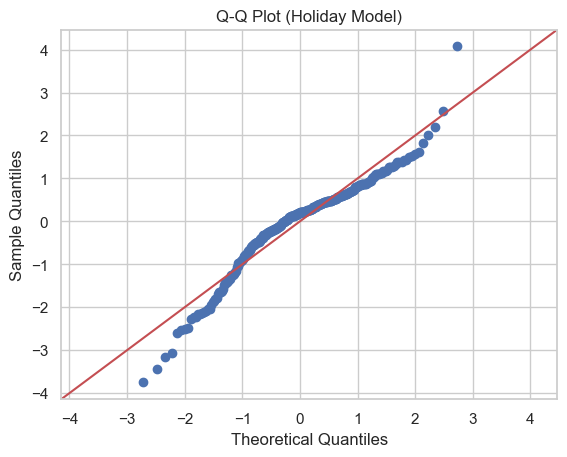

In [424]:
# Q-Q Plot for Residuals Holiday Model Normality
sm.qqplot(holiday_model.resid, line='45', fit=True)
plt.title('Q-Q Plot (Holiday Model)')
plt.show()


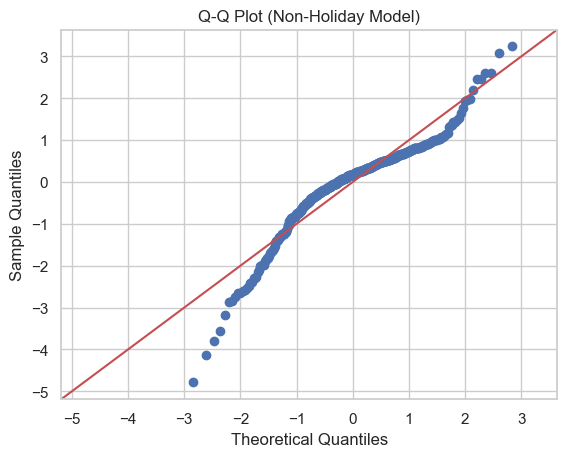

In [427]:
# Q-Q Plot for Residuals Non Holiday Model
sm.qqplot(non_holiday_model.resid, line='45', fit=True)
plt.title('Q-Q Plot (Non-Holiday Model)')
plt.show()


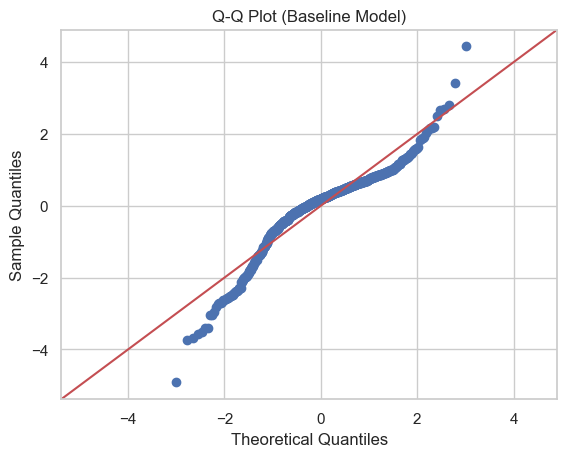

In [428]:
# Q-Q Plot for Residuals Baseline Model
sm.qqplot(baseline_model.resid, line='45', fit=True)
plt.title('Q-Q Plot (Baseline Model)')
plt.show()


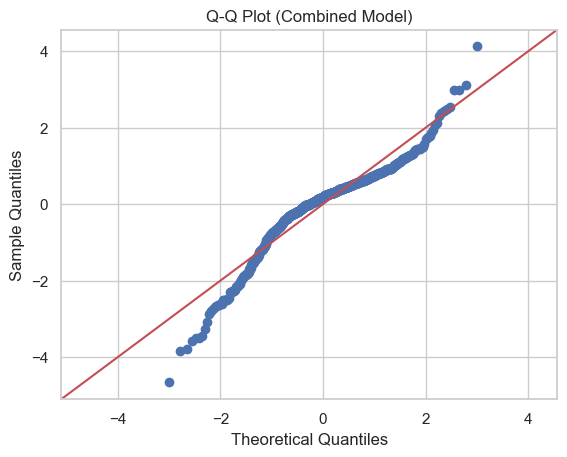

In [429]:
# Q-Q Plot for Residuals Combined Model
sm.qqplot(combined_model.resid, line='45', fit=True)
plt.title('Q-Q Plot (Combined Model)')
plt.show()

In [ ]:
#LINEARITY

Scatterplots for Non-Holiday Model


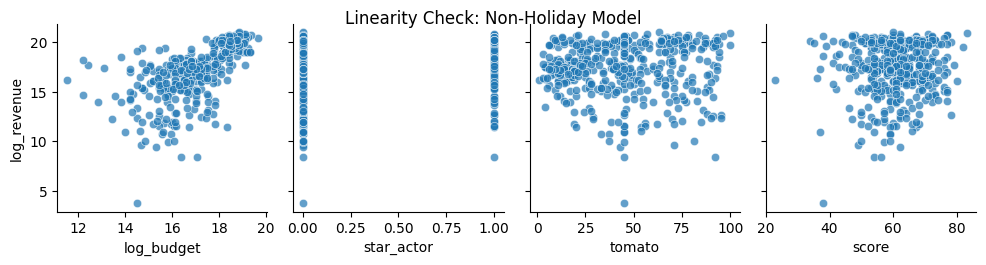

Scatterplots for Holiday Model


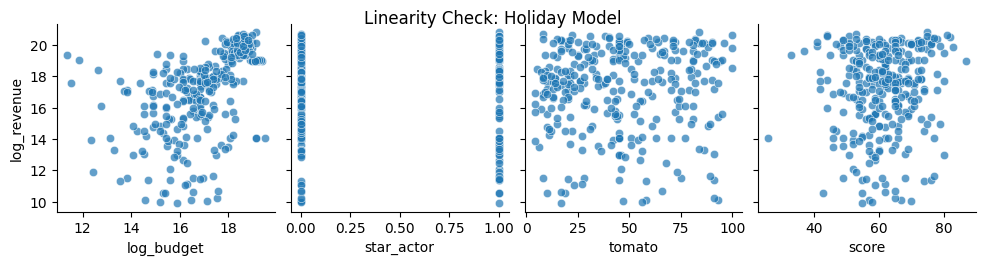

Scatterplots for Holiday Model


NameError: name 'combined' is not defined

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of independent variables for scatterplots
independent_variables = ['log_budget', 'star_actor', 'tomato', 'score']

# Dependent variable
dependent_variable = 'log_revenue'

# Scatterplot matrix for Non-Holiday Model
print("Scatterplots for Non-Holiday Model")
sns.pairplot(data=data_non_holiday, 
             x_vars=independent_variables, 
             y_vars=[dependent_variable], 
             kind='scatter', 
             plot_kws={'alpha': 0.7})
plt.suptitle("Linearity Check: Non-Holiday Model", y=1.02)
plt.show()

# Scatterplot matrix for Holiday Model
print("Scatterplots for Holiday Model")
sns.pairplot(data=data_holiday, 
             x_vars=independent_variables, 
             y_vars=[dependent_variable], 
             kind='scatter', 
             plot_kws={'alpha': 0.7})
plt.suptitle("Linearity Check: Holiday Model", y=1.02)
plt.show()


# Scatterplot matrix for Combined Model
print("Scatterplots for Holiday Model")
sns.pairplot(data=combined, 
             x_vars=independent_variables, 
             y_vars=[dependent_variable], 
             kind='scatter', 
             plot_kws={'alpha': 0.7})
plt.suptitle("Linearity Check: Holiday Model", y=1.02)
plt.show()

sns.pairplot(data=data_baseline, 
             x_vars=independent_variables, 
             y_vars=[dependent_variable], 
             kind='scatter', 
             plot_kws={'alpha': 0.7})
plt.suptitle("Linearity Check: Holiday Model", y=1.02)
plt.show()






In [435]:
from statsmodels.stats.diagnostic import linear_rainbow

# Rainbow Test for Non-Holiday Model
rainbow_stat_non_holiday, rainbow_pval_non_holiday = linear_rainbow(non_holiday_model)
print(f"Rainbow Test for Non-Holiday Model:\nStatistic: {rainbow_stat_non_holiday}, p-value: {rainbow_pval_non_holiday}")

# Rainbow Test for Holiday Model
rainbow_stat_holiday, rainbow_pval_holiday = linear_rainbow(holiday_model)
print(f"Rainbow Test for Holiday Model:\nStatistic: {rainbow_stat_holiday}, p-value: {rainbow_pval_holiday}")


Rainbow Test for Non-Holiday Model:
Statistic: 0.7057618770201675, p-value: 0.9943383890602946
Rainbow Test for Holiday Model:
Statistic: 1.1305000284935107, p-value: 0.22978876595399952


In [437]:
from statsmodels.stats.diagnostic import linear_rainbow

# Rainbow Test for Baseline Model
rainbow_stat_baseline, rainbow_pval_baseline = linear_rainbow(baseline_model)
print(f"Rainbow Test for Baseline Model:\nStatistic: {rainbow_stat_baseline}, p-value: {rainbow_pval_non_holiday}")

# Rainbow Test for Combined Model
rainbow_stat_combined, rainbow_pval_combined = linear_rainbow(combined_model)
print(f"Rainbow Test for Combined Model:\nStatistic: {rainbow_stat_combined}, p-value: {rainbow_pval_holiday}")


Rainbow Test for Baseline Model:
Statistic: 0.8826834061669707, p-value: 0.9943383890602946
Rainbow Test for Combined Model:
Statistic: 0.8770134718237695, p-value: 0.22978876595399952


In [ ]:
##Checking Influential Outliers

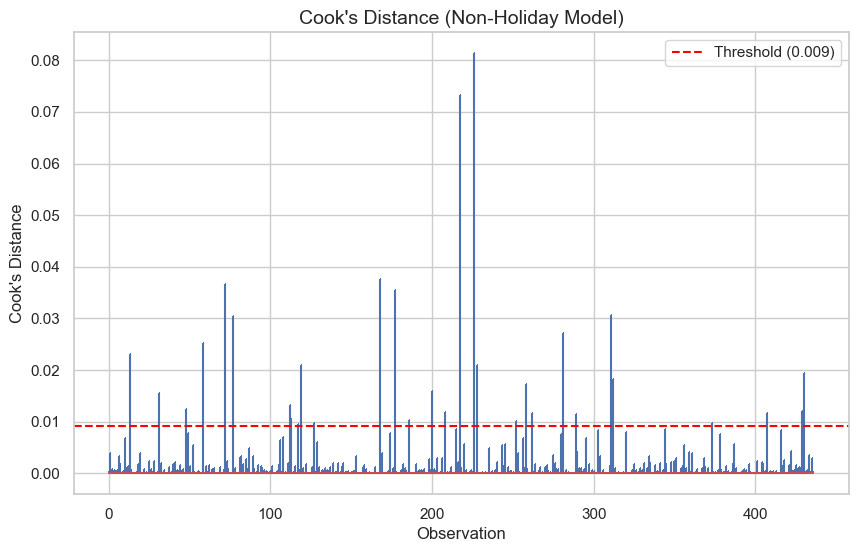

High influence points: [ 13  31  48  58  72  77 112 113 117 119 127 168 177 186 200 208 217 226
 228 252 258 262 281 289 311 312 373 407 429 430]


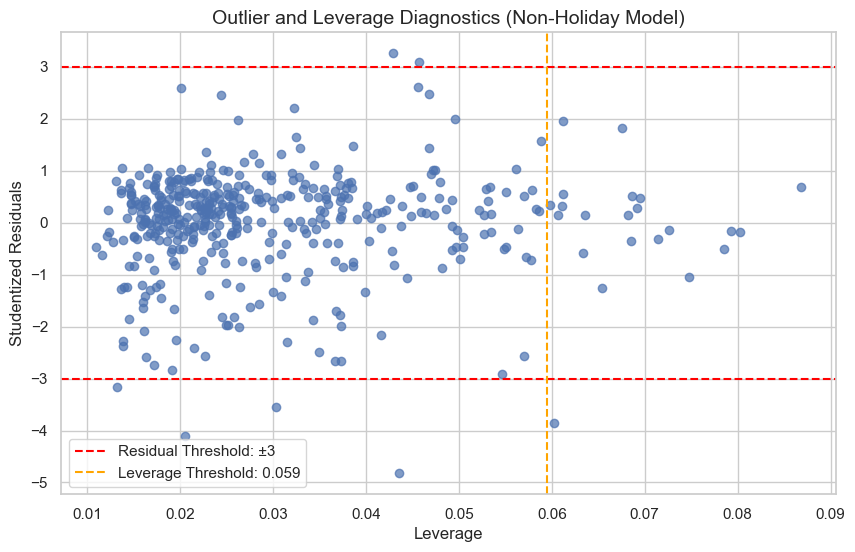

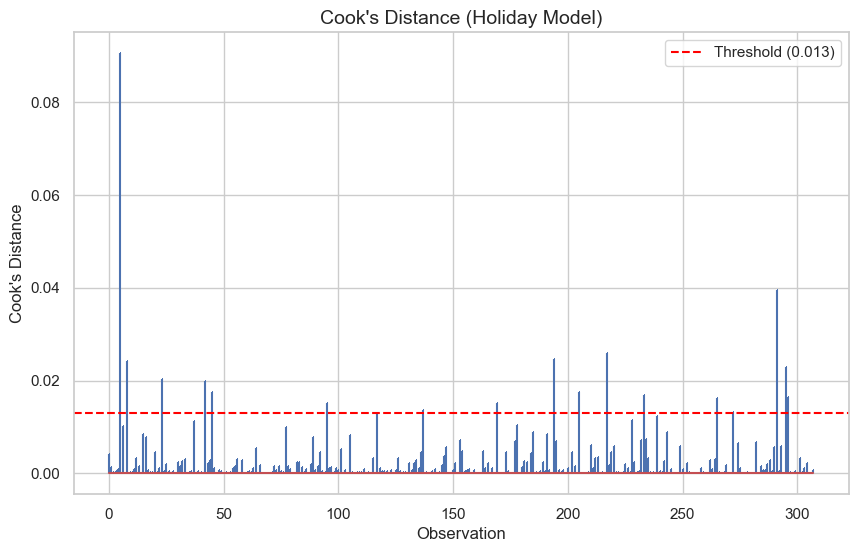

High influence points: [  5   8  23  42  45  95 117 137 169 194 205 217 233 265 272 291 295 296]


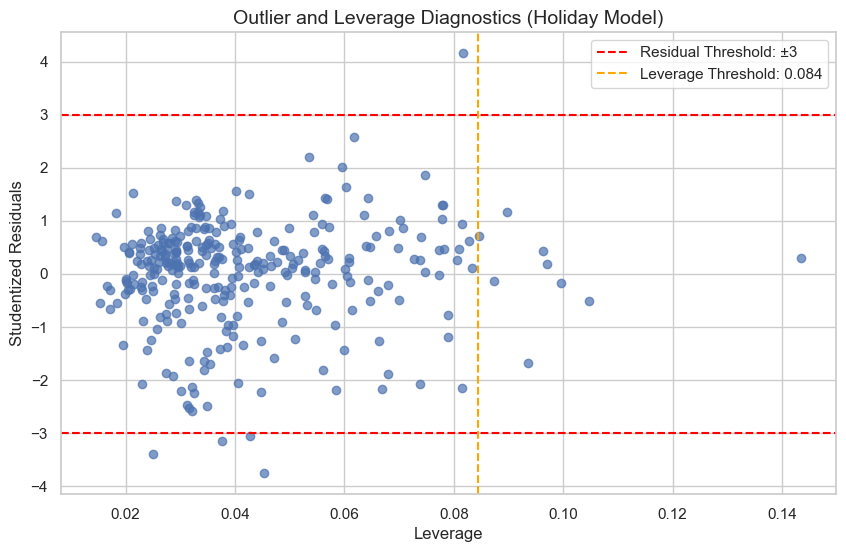

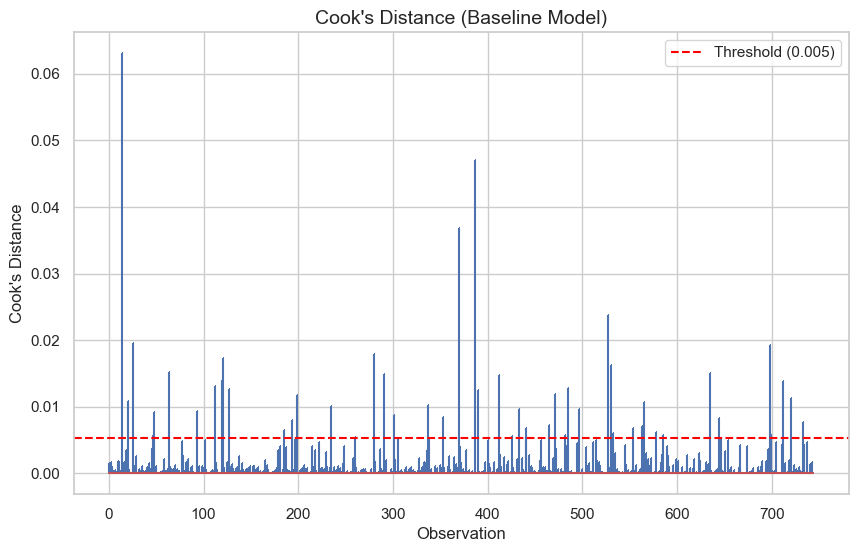

High influence points: [ 14  20  26  47  48  64  93 112 119 121 127 185 193 199 235 260 280 291
 301 337 353 370 387 390 412 426 433 440 441 465 471 482 485 497 527 530
 532 553 563 565 578 585 635 644 698 699 712 720 733]


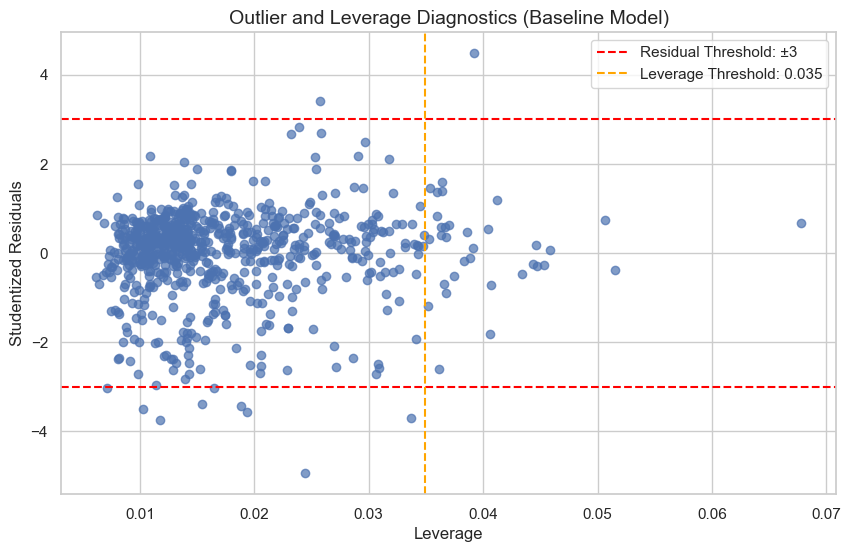

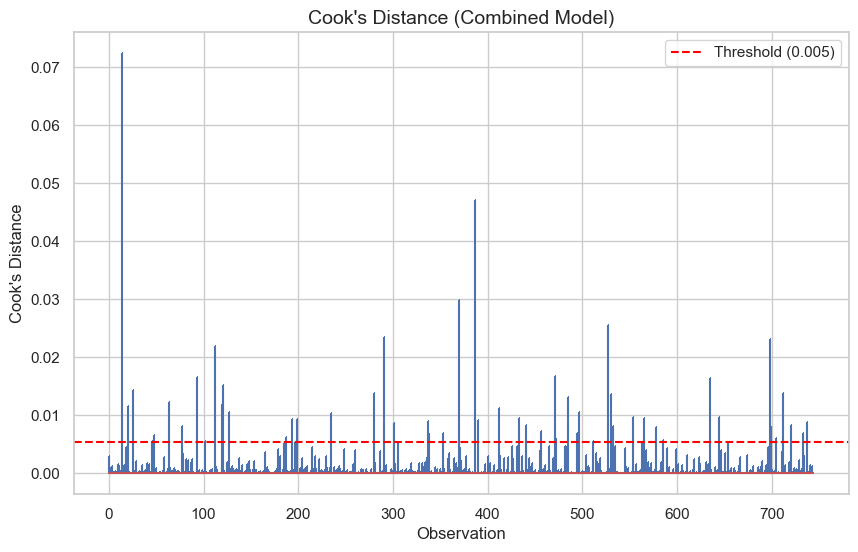

High influence points: [ 14  20  26  46  48  64  77  93 102 112 119 121 127 187 193 197 199 235
 280 291 301 337 338 353 370 387 390 412 433 441 456 471 472 485 494 497
 511 527 530 532 553 565 578 585 635 644 698 699 704 712 720 733 737]


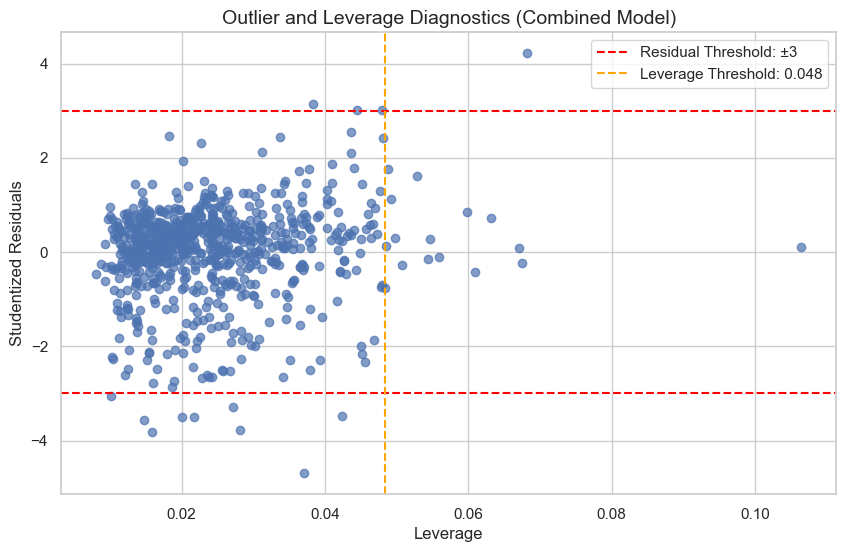

In [439]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Define a function to plot Cook's Distance
def plot_cooks_distance(model, title):
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]
    threshold = 4 / len(cooks_d)  # Conservative threshold
    high_influence_points = np.where(cooks_d > threshold)[0]
    
    plt.figure(figsize=(10, 6))
    plt.stem(cooks_d, markerfmt=",")  # Removed 'use_line_collection'
    plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold ({round(threshold, 3)})')
    plt.title(title, fontsize=14)
    plt.xlabel('Observation', fontsize=12)
    plt.ylabel("Cook's Distance", fontsize=12)
    plt.legend()
    plt.show()
    
    print(f"High influence points: {high_influence_points}")

# Define a function to plot leverage vs residuals
def plot_leverage_residuals(model, title):
    influence = OLSInfluence(model)
    leverage = influence.hat_matrix_diag
    studentized_residuals = influence.resid_studentized_internal
    
    plt.figure(figsize=(10, 6))
    plt.scatter(leverage, studentized_residuals, alpha=0.7)
    plt.axhline(3, color='red', linestyle='--', label="Residual Threshold: ±3")
    plt.axhline(-3, color='red', linestyle='--')
    plt.axvline(2 * np.mean(leverage), color='orange', linestyle='--', label=f"Leverage Threshold: {round(2 * np.mean(leverage), 3)}")
    plt.title(title, fontsize=14)
    plt.xlabel('Leverage', fontsize=12)
    plt.ylabel('Studentized Residuals', fontsize=12)
    plt.legend()
    plt.show()

# Check for influential outliers for Non-Holiday Model
plot_cooks_distance(non_holiday_model, "Cook's Distance (Non-Holiday Model)")
plot_leverage_residuals(non_holiday_model, "Outlier and Leverage Diagnostics (Non-Holiday Model)")

# Check for influential outliers for Holiday Model
plot_cooks_distance(holiday_model, "Cook's Distance (Holiday Model)")
plot_leverage_residuals(holiday_model, "Outlier and Leverage Diagnostics (Holiday Model)")

# Check for influential outliers for Baseline Model
plot_cooks_distance(baseline_model, "Cook's Distance (Baseline Model)")
plot_leverage_residuals(baseline_model, "Outlier and Leverage Diagnostics (Baseline Model)")

# Check for influential outliers for Combined Model
plot_cooks_distance(combined_model, "Cook's Distance (Combined Model)")
plot_leverage_residuals(combined_model, "Outlier and Leverage Diagnostics (Combined Model)")


In [ ]:
# ensure all variables are ready for the models. Interaction terms will be centered if needed (especially for the Holiday and Combined Models).


In [ ]:
#Address Identified Issues:

#Homoscedasticity: Use of robust standard errors for all models to mitigate the impact of heteroscedasticity.
#Multicollinearity in Holiday and Combined Models: Center interaction terms (e.g., subtracting the mean) to reduce multicollinearity and stabilize estimates.

#Models:

#Regressions for the Non-Holiday, Holiday, Combined, and Baseline Models using robust standard errors.
#Compare coefficients and significance levels to evaluate the impact of key predictors (budget, reviews, star actors) and the moderating effect of holiday seasons.

#Isolate Effects for Hypotheses:

#For each hypothesis, isolate the relevant variables (e.g., consumer reviews for Hypothesis 1) in separate regressions with controls and interaction terms.

#This ensures clarity in addressing how specific factors influence revenue during holiday and non-holiday seasons.

#Model Comparisons:

#Compare results across models to understand how holiday seasons moderate the effects of budget, reviews, and star actors.
#Evaluate adjusted R-squared values to assess model fit and explanatory power.

#Interpret Results:

#Focus on the strength, direction, and significance of key predictors.
#Highlight differences between holiday and non-holiday periods in their impact on box office performance.


In [541]:
import pandas as pd
import statsmodels.api as sm


# Define variables for each model
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']
independent_vars = ['log_budget', 'star_actor', 'tomato', 'score']
interaction_terms = ['holiday_budget', 'holiday_star_actor', 'holiday_tomato', 'holiday_score']

# Create interaction terms for the Holiday and Combined Models
data['holiday_budget'] = data['log_budget'] * data['Holiday']
data['holiday_star_actor'] = data['star_actor'] * data['Holiday']
data['holiday_tomato'] = data['tomato'] * data['Holiday']
data['holiday_score'] = data['score'] * data['Holiday']

# Center interaction terms for stability
data['log_budget_c'] = data['log_budget'] - data['log_budget'].mean()
data['score_c'] = data['score'] - data['score'].mean()
data['tomato_c'] = data['tomato'] - data['tomato'].mean()
data['holiday_budget_c'] = data['holiday_budget'] - data['holiday_budget'].mean()
data['holiday_score_c'] = data['holiday_score'] - data['holiday_score'].mean()


In [ ]:
#Regressions for Each Model

In [ ]:
#Non-Holiday Model

In [455]:
X_non_holiday = sm.add_constant(data[data['Holiday'] == 0][independent_vars + control_vars])
y_non_holiday = data[data['Holiday'] == 0]['log_revenue']

non_holiday_model = sm.OLS(y_non_holiday, X_non_holiday).fit()
print(non_holiday_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     28.46
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           2.83e-47
Time:                        04:32:37   Log-Likelihood:                -921.46
No. Observations:                 437   AIC:                             1869.
Df Residuals:                     424   BIC:                             1922.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2772      1.474     -3.581      0.0

In [487]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the non-holiday model
X_non_holiday = sm.add_constant(data[data['Holiday'] == 0][independent_vars + control_vars])
y_non_holiday = data[data['Holiday'] == 0]['log_revenue']

# Fit the non-holiday model
non_holiday_model = sm.OLS(y_non_holiday, X_non_holiday).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': non_holiday_model.params.index,  # Variable names
    'Coef.': non_holiday_model.params.values,    # Coefficients
    'Std.Err': non_holiday_model.bse.values,     # Standard errors
    't-value': non_holiday_model.tvalues.values, # t-statistics
    'p-value': non_holiday_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            non_holiday_model.nobs,               # Observations
            non_holiday_model.rsquared,           # R-Squared
            non_holiday_model.rsquared_adj,       # Adjusted R-Squared
            non_holiday_model.aic,                # AIC
            non_holiday_model.bic,                # BIC
            non_holiday_model.llf,                # Log-Likelihood
            non_holiday_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, non_holiday_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if non_holiday_model.f_pvalue < 0.01 else '**' if non_holiday_model.f_pvalue < 0.05 else '*' if non_holiday_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("non_holiday_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nNon-Holiday Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Non-holiday model regression table saved to 'non_holiday_model_table.csv'.")



Non-Holiday Model Coefficients Table:
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|    | Variable           |        Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+==============+==============+=============+===============+========+
|  0 | const              |   -5.2772    |   1.47384    |  -3.58059   |   0.000382505 | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |    1.22236   |   0.0727994  |  16.7908    |   7.07813e-49 | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |   -0.359694  |   0.223675   |  -1.60811   |   0.108555    |        |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  3 | tomato             |   -0.0127741 |   0.00426442 |  -2.99551   |   0.00290049  | 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\1347000076.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [456]:
#Holiday Model

In [457]:
X_holiday = sm.add_constant(data[data['Holiday'] == 1][independent_vars + interaction_terms + control_vars])
y_holiday = data[data['Holiday'] == 1]['log_revenue']

holiday_model = sm.OLS(y_holiday, X_holiday).fit()
print(holiday_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           2.88e-20
Time:                        04:33:16   Log-Likelihood:                -679.76
No. Observations:                 308   AIC:                             1386.
Df Residuals:                     295   BIC:                             1434.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7667      1

In [488]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the holiday model
X_holiday = sm.add_constant(data[data['Holiday'] == 1][independent_vars + interaction_terms + control_vars])
y_holiday = data[data['Holiday'] == 1]['log_revenue']

# Fit the holiday model
holiday_model = sm.OLS(y_holiday, X_holiday).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': holiday_model.params.index,  # Variable names
    'Coef.': holiday_model.params.values,    # Coefficients
    'Std.Err': holiday_model.bse.values,     # Standard errors
    't-value': holiday_model.tvalues.values, # t-statistics
    'p-value': holiday_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            holiday_model.nobs,               # Observations
            holiday_model.rsquared,           # R-Squared
            holiday_model.rsquared_adj,       # Adjusted R-Squared
            holiday_model.aic,                # AIC
            holiday_model.bic,                # BIC
            holiday_model.llf,                # Log-Likelihood
            holiday_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, holiday_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if holiday_model.f_pvalue < 0.01 else '**' if holiday_model.f_pvalue < 0.05 else '*' if holiday_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("holiday_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nHoliday Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Holiday model regression table saved to 'holiday_model_table.csv'.")



Holiday Model Coefficients Table:
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+==============+=============+===============+========+
|  0 | const              |    0.766738    |   1.72614    |   0.444193  |   0.657229    |        |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |    0.47695     |   0.0419789  |  11.3617    |   4.68548e-25 | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |   -0.429547    |   0.147814   |  -2.90599   |   0.00393823  | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  3 | tomato             |   -0.000876189 |   0.00283052 |  -0.30955   | 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2229349974.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Baseline Model

In [458]:
X_baseline = sm.add_constant(data[independent_vars + control_vars])
y_baseline = data['log_revenue']

baseline_model = sm.OLS(y_baseline, X_baseline).fit()
print(baseline_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     37.24
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.31e-68
Time:                        04:33:45   Log-Likelihood:                -1615.5
No. Observations:                 745   AIC:                             3257.
Df Residuals:                     732   BIC:                             3317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5593      1.114     -2.297      0.0

In [489]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the baseline model
X_baseline = sm.add_constant(data[independent_vars + control_vars])
y_baseline = data['log_revenue']

# Fit the baseline model
baseline_model = sm.OLS(y_baseline, X_baseline).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': baseline_model.params.index,  # Variable names
    'Coef.': baseline_model.params.values,    # Coefficients
    'Std.Err': baseline_model.bse.values,     # Standard errors
    't-value': baseline_model.tvalues.values, # t-statistics
    'p-value': baseline_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            baseline_model.nobs,               # Observations
            baseline_model.rsquared,           # R-Squared
            baseline_model.rsquared_adj,       # Adjusted R-Squared
            baseline_model.aic,                # AIC
            baseline_model.bic,                # BIC
            baseline_model.llf,                # Log-Likelihood
            baseline_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, baseline_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if baseline_model.f_pvalue < 0.01 else '**' if baseline_model.f_pvalue < 0.05 else '*' if baseline_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("baseline_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nBaseline Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Baseline model regression table saved to 'baseline_model_table.csv'.")



Baseline Model Coefficients Table:
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+==============+=============+===============+========+
|  0 | const              |    -2.55925    |   1.11431    |  -2.29672   |   0.0219164   | **     |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |     1.10157    |   0.0546412  |  20.1601    |   3.12544e-72 | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |    -0.510456   |   0.17818    |  -2.86483   |   0.00429184  | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  3 | tomato             |    -0.00737735 |   0.00341857 |  -2.15802   |

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\1315957619.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Combined Model

In [459]:
X_combined = sm.add_constant(data[independent_vars + interaction_terms + control_vars])
y_combined = data['log_revenue']

combined_model = sm.OLS(y_combined, X_combined).fit()
print(combined_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     28.48
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.44e-66
Time:                        04:34:08   Log-Likelihood:                -1611.9
No. Observations:                 745   AIC:                             3258.
Df Residuals:                     728   BIC:                             3336.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4559      1

In [490]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the combined model
X_combined = sm.add_constant(data[independent_vars + interaction_terms + control_vars])
y_combined = data['log_revenue']

# Fit the combined model
combined_model = sm.OLS(y_combined, X_combined).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': combined_model.params.index,  # Variable names
    'Coef.': combined_model.params.values,    # Coefficients
    'Std.Err': combined_model.bse.values,     # Standard errors
    't-value': combined_model.tvalues.values, # t-statistics
    'p-value': combined_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            combined_model.nobs,               # Observations
            combined_model.rsquared,           # R-Squared
            combined_model.rsquared_adj,       # Adjusted R-Squared
            combined_model.aic,                # AIC
            combined_model.bic,                # BIC
            combined_model.llf,                # Log-Likelihood
            combined_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, combined_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if combined_model.f_pvalue < 0.01 else '**' if combined_model.f_pvalue < 0.05 else '*' if combined_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("combined_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nCombined Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Combined model regression table saved to 'combined_model_table.csv'.")



Combined Model Coefficients Table:
+----+--------------------+----------------+--------------+------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |    t-value |       p-value | Sig.   |
+====+====================+================+==============+============+===============+========+
|  0 | const              |    -2.45588    |   1.1145     |  -2.20356  |   0.0278676   | **     |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  1 | log_budget         |     1.11537    |   0.0601041  |  18.5573   |   3.06296e-63 | ***    |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  2 | star_actor         |    -0.186997   |   0.229662   |  -0.814228 |   0.415781    |        |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  3 | tomato             |    -0.0102491  |   0.00440544 |  -2.32647  |   0.02026

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\1355851919.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
 #Analyze Hypotheses

In [ ]:
#Hypothesis 1: Consumer Reviews

In [460]:
X_h1 = sm.add_constant(data[['score', 'Holiday'] + control_vars])
y_h1 = data['log_revenue']

h1_model = sm.OLS(y_h1, X_h1).fit()
print(h1_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.521
Date:                Fri, 10 Jan 2025   Prob (F-statistic):            0.00550
Time:                        04:34:48   Log-Likelihood:                -1780.4
No. Observations:                 745   AIC:                             3583.
Df Residuals:                     734   BIC:                             3634.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4336      0.814     18.958      0.0

In [491]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the H1 model
X_h1 = sm.add_constant(data[['score', 'Holiday'] + control_vars])
y_h1 = data['log_revenue']

# Fit the H1 model
h1_model = sm.OLS(y_h1, X_h1).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': h1_model.params.index,  # Variable names
    'Coef.': h1_model.params.values,    # Coefficients
    'Std.Err': h1_model.bse.values,     # Standard errors
    't-value': h1_model.tvalues.values, # t-statistics
    'p-value': h1_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            h1_model.nobs,               # Observations
            h1_model.rsquared,           # R-Squared
            h1_model.rsquared_adj,       # Adjusted R-Squared
            h1_model.aic,                # AIC
            h1_model.bic,                # BIC
            h1_model.llf,                # Log-Likelihood
            h1_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, h1_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if h1_model.f_pvalue < 0.01 else '**' if h1_model.f_pvalue < 0.05 else '*' if h1_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("h1_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nH1 Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("H1 model regression table saved to 'h1_model_table.csv'.")



H1 Model Coefficients Table:
+----+--------------------+---------------+-------------+------------+---------------+--------+
|    | Variable           |         Coef. |     Std.Err |    t-value |       p-value | Sig.   |
+====+====================+===============+=============+============+===============+========+
|  0 | const              |    15.4336    |   0.814088  |  18.9582   |   1.53478e-65 | ***    |
+----+--------------------+---------------+-------------+------------+---------------+--------+
|  1 | score              |     0.026596  |   0.0123039 |   2.16159  |   0.0309727   | **     |
+----+--------------------+---------------+-------------+------------+---------------+--------+
|  2 | Holiday            |    -0.133591  |   0.199532  |  -0.669521 |   0.503374    |        |
+----+--------------------+---------------+-------------+------------+---------------+--------+
|  3 | action             |    -0.218665  |   0.282042  |  -0.775295 |   0.438415    |        |
+----+----

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3994486954.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Hypothesis 2: Professional Reviews

In [461]:
X_h2 = sm.add_constant(data[['tomato', 'Holiday'] + control_vars])
y_h2 = data['log_revenue']

h2_model = sm.OLS(y_h2, X_h2).fit()
print(h2_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.102
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0223
Time:                        04:35:07   Log-Likelihood:                -1782.5
No. Observations:                 745   AIC:                             3587.
Df Residuals:                     734   BIC:                             3638.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9541      0.337     50.372      0.0

In [492]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the H2 model
X_h2 = sm.add_constant(data[['tomato', 'Holiday'] + control_vars])
y_h2 = data['log_revenue']

# Fit the H2 model
h2_model = sm.OLS(y_h2, X_h2).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': h2_model.params.index,  # Variable names
    'Coef.': h2_model.params.values,    # Coefficients
    'Std.Err': h2_model.bse.values,     # Standard errors
    't-value': h2_model.tvalues.values, # t-statistics
    'p-value': h2_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            h2_model.nobs,               # Observations
            h2_model.rsquared,           # R-Squared
            h2_model.rsquared_adj,       # Adjusted R-Squared
            h2_model.aic,                # AIC
            h2_model.bic,                # BIC
            h2_model.llf,                # Log-Likelihood
            h2_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, h2_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if h2_model.f_pvalue < 0.01 else '**' if h2_model.f_pvalue < 0.05 else '*' if h2_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("h2_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nH2 Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("H2 model regression table saved to 'h2_model_table.csv'.")



H2 Model Coefficients Table:
+----+--------------------+----------------+-------------+------------+----------------+--------+
|    | Variable           |          Coef. |     Std.Err |    t-value |        p-value | Sig.   |
+====+====================+================+=============+============+================+========+
|  0 | const              |    16.9541     |   0.33658   |  50.3716   |   2.14791e-240 | ***    |
+----+--------------------+----------------+-------------+------------+----------------+--------+
|  1 | tomato             |     0.00301615 |   0.0039109 |   0.771217 |   0.440827     |        |
+----+--------------------+----------------+-------------+------------+----------------+--------+
|  2 | Holiday            |    -0.112172   |   0.199809  |  -0.561396 |   0.574699     |        |
+----+--------------------+----------------+-------------+------------+----------------+--------+
|  3 | action             |    -0.312165   |   0.279443  |  -1.11709  |   0.264319     |

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3301134694.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Hypothesis 3: Budget

In [462]:
X_h3 = sm.add_constant(data[['log_budget', 'Holiday'] + control_vars])
y_h3 = data['log_revenue']

h3_model = sm.OLS(y_h3, X_h3).fit()
print(h3_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     42.56
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.85e-66
Time:                        04:35:30   Log-Likelihood:                -1622.6
No. Observations:                 745   AIC:                             3267.
Df Residuals:                     734   BIC:                             3318.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3561      0.959     -1.413      0.1

In [493]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the H3 model
X_h3 = sm.add_constant(data[['log_budget', 'Holiday'] + control_vars])
y_h3 = data['log_revenue']

# Fit the H3 model
h3_model = sm.OLS(y_h3, X_h3).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': h3_model.params.index,  # Variable names
    'Coef.': h3_model.params.values,    # Coefficients
    'Std.Err': h3_model.bse.values,     # Standard errors
    't-value': h3_model.tvalues.values, # t-statistics
    'p-value': h3_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            h3_model.nobs,               # Observations
            h3_model.rsquared,           # R-Squared
            h3_model.rsquared_adj,       # Adjusted R-Squared
            h3_model.aic,                # AIC
            h3_model.bic,                # BIC
            h3_model.llf,                # Log-Likelihood
            h3_model.fvalue              # F-Statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, h3_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if h3_model.f_pvalue < 0.01 else '**' if h3_model.f_pvalue < 0.05 else '*' if h3_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("h3_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nH3 Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("H3 model regression table saved to 'h3_model_table.csv'.")



H3 Model Coefficients Table:
+----+--------------------+----------------+-------------+-------------+---------------+--------+
|    | Variable           |          Coef. |     Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+=============+=============+===============+========+
|  0 | const              |    -1.35615    |   0.959453  |  -1.41346   |   0.157944    |        |
+----+--------------------+----------------+-------------+-------------+---------------+--------+
|  1 | log_budget         |     1.08405    |   0.0545977 |  19.8552    |   1.50327e-70 | ***    |
+----+--------------------+----------------+-------------+-------------+---------------+--------+
|  2 | Holiday            |     0.059626   |   0.161444  |   0.369329  |   0.711989    |        |
+----+--------------------+----------------+-------------+-------------+---------------+--------+
|  3 | action             |    -0.605093   |   0.225966  |  -2.67781   |   0.00757629  |

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\1794846429.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Hypothesis 4: Star Actors

In [463]:
X_h4 = sm.add_constant(data[['star_actor', 'Holiday'] + control_vars])
y_h4 = data['log_revenue']

h4_model = sm.OLS(y_h4, X_h4).fit()
print(h4_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.166
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0181
Time:                        04:35:50   Log-Likelihood:                -1782.1
No. Observations:                 745   AIC:                             3586.
Df Residuals:                     734   BIC:                             3637.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1213      0.306     55.976      0.0

In [495]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define predictors and dependent variable for the H4 model
X_h4 = sm.add_constant(data[['star_actor', 'Holiday'] + control_vars])
y_h4 = data['log_revenue']

# Fit the H4 model
h4_model = sm.OLS(y_h4, X_h4).fit()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': h4_model.params.index,  # Variable names
    'Coef.': h4_model.params.values,    # Coefficients
    'Std.Err': h4_model.bse.values,     # Standard errors
    't-value': h4_model.tvalues.values, # t-statistics
    'p-value': h4_model.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            h4_model.nobs,               # Observations
            h4_model.rsquared,           # R-Squared
            h4_model.rsquared_adj,       # Adjusted R-Squared
            h4_model.aic,                # AIC
            h4_model.bic,                # BIC
            h4_model.llf,                # Log-Likelihood
            h4_model.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, h4_model.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if h4_model.f_pvalue < 0.01 else '**' if h4_model.f_pvalue < 0.05 else '*' if h4_model.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("h4_model_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nH4 Model Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("H4 model regression table saved to 'h4_model_table.csv'.")



H4 Model Coefficients Table:
+----+--------------------+---------------+------------+------------+----------------+--------+
|    | Variable           |         Coef. |    Std.Err |    t-value |        p-value | Sig.   |
+====+====================+===============+============+============+================+========+
|  0 | const              |    17.1213    |   0.305872 |  55.9756   |   4.44256e-267 | ***    |
+----+--------------------+---------------+------------+------------+----------------+--------+
|  1 | star_actor         |    -0.245705  |   0.221964 |  -1.10696  |   0.268673     |        |
+----+--------------------+---------------+------------+------------+----------------+--------+
|  2 | Holiday            |    -0.113427  |   0.199729 |  -0.567904 |   0.570274     |        |
+----+--------------------+---------------+------------+------------+----------------+--------+
|  3 | action             |    -0.259763  |   0.283379 |  -0.916662 |   0.359621     |        |
+----+----

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2770375026.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\regressionplots.py:566: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


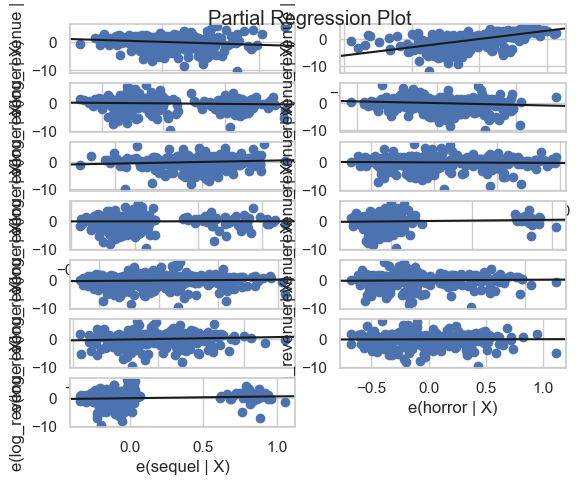

In [464]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
plot_partregress_grid(non_holiday_model)
plt.show()


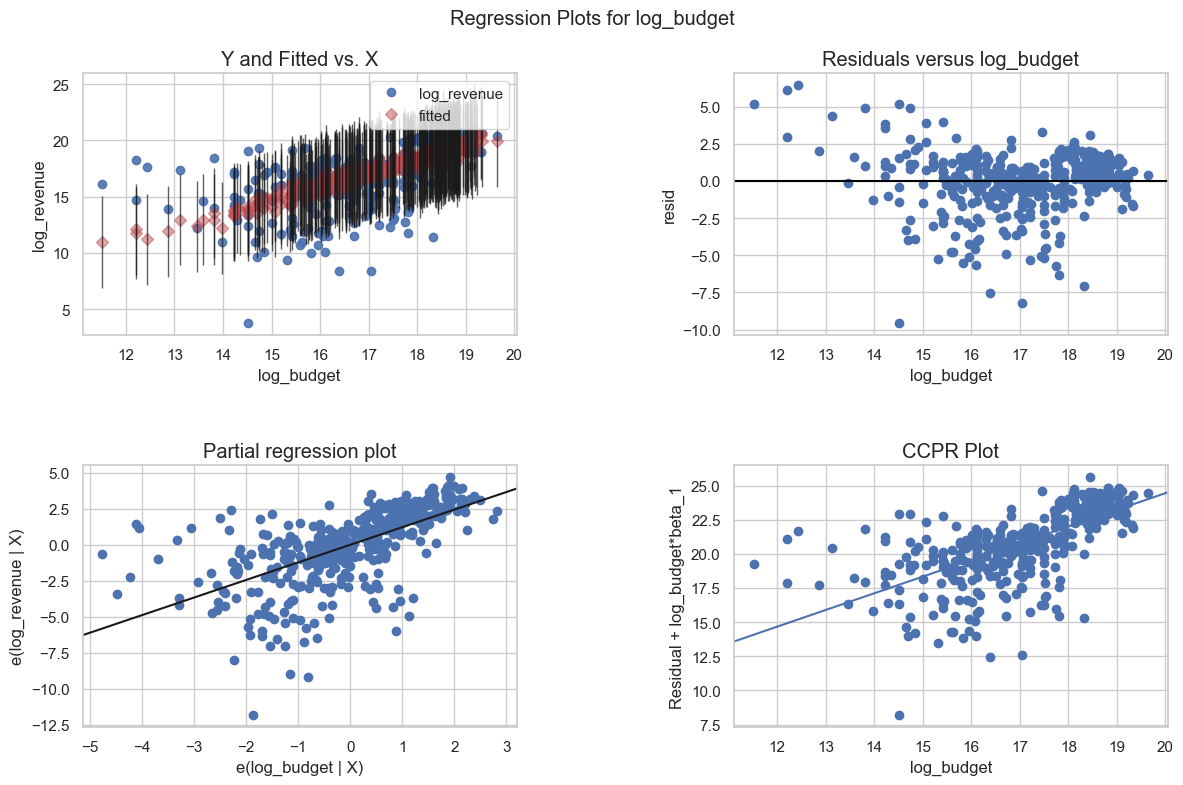

In [469]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example code for regression diagnostic plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(non_holiday_model, 'log_budget', fig=fig)

# Manually adjust the layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing as needed
plt.show()


In [ ]:
#Robust Standard Errors

In [ ]:
# Non-Holiday Rubust model

In [465]:
non_holiday_model_robust = non_holiday_model.get_robustcov_results()
print(non_holiday_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     17.75
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           5.70e-31
Time:                        04:37:19   Log-Likelihood:                -921.46
No. Observations:                 437   AIC:                             1869.
Df Residuals:                     424   BIC:                             1922.
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2772      2.023     -2.609      0.0

In [497]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Retrieve robust covariance results for the non-holiday model
non_holiday_model_robust = non_holiday_model.get_robustcov_results()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': non_holiday_model_robust.params.index,  # Variable names
    'Coef.': non_holiday_model_robust.params.values,    # Coefficients
    'Std.Err': non_holiday_model_robust.bse.values,     # Robust standard errors
    't-value': non_holiday_model_robust.tvalues.values, # t-statistics
    'p-value': non_holiday_model_robust.pvalues.values  # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            non_holiday_model_robust.nobs,               # Observations
            non_holiday_model_robust.rsquared,           # R-Squared
            non_holiday_model_robust.rsquared_adj,       # Adjusted R-Squared
            non_holiday_model_robust.aic,                # AIC
            non_holiday_model_robust.bic,                # BIC
            non_holiday_model_robust.llf,                # Log-Likelihood
            non_holiday_model_robust.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, non_holiday_model_robust.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if non_holiday_model_robust.f_pvalue < 0.01 else '**' if non_holiday_model_robust.f_pvalue < 0.05 else '*' if non_holiday_model_robust.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("non_holiday_model_robust_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nNon-Holiday Model (Robust) Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Non-holiday model (robust) regression table saved to 'non_holiday_model_robust_table.csv'.")


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [499]:
import pandas as pd
from tabulate import tabulate

# Retrieve robust covariance results for the non-holiday model
non_holiday_model_robust = non_holiday_model.get_robustcov_results()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': non_holiday_model_robust.model.exog_names,  # Variable names
    'Coef.': non_holiday_model_robust.params,              # Coefficients
    'Std.Err': non_holiday_model_robust.bse,               # Robust standard errors
    't-value': non_holiday_model_robust.tvalues,           # t-statistics
    'p-value': non_holiday_model_robust.pvalues            # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            non_holiday_model_robust.nobs,               # Observations
            non_holiday_model_robust.rsquared,           # R-Squared
            non_holiday_model_robust.rsquared_adj,       # Adjusted R-Squared
            non_holiday_model_robust.aic,                # AIC
            non_holiday_model_robust.bic,                # BIC
            non_holiday_model_robust.llf,                # Log-Likelihood
            non_holiday_model_robust.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, non_holiday_model_robust.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if non_holiday_model_robust.f_pvalue < 0.01 else '**' if non_holiday_model_robust.f_pvalue < 0.05 else '*' if non_holiday_model_robust.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("non_holiday_model_robust_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nNon-Holiday Model (Robust) Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Non-holiday model (robust) regression table saved to 'non_holiday_model_robust_table.csv'.")



Non-Holiday Model (Robust) Coefficients Table:
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|    | Variable           |        Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+==============+==============+=============+===============+========+
|  0 | const              |   -5.2772    |   2.02252    |  -2.60922   |   0.0093957   | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |    1.22236   |   0.0963452  |  12.6873    |   1.71893e-31 | ***    |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |   -0.359694  |   0.198227   |  -1.81456   |   0.0702988   | *      |
+----+--------------------+--------------+--------------+-------------+---------------+--------+
|  3 | tomato             |   -0.0127741 |   0.00467041 |  -2.73512   |   0.006

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3711628784.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Holiday Model

In [466]:
holiday_model_robust = holiday_model.get_robustcov_results()
print(holiday_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     7.917
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.04e-13
Time:                        04:38:50   Log-Likelihood:                -679.76
No. Observations:                 308   AIC:                             1386.
Df Residuals:                     295   BIC:                             1434.
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7667      2

C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 12
  warnings.warn('covariance of constraints does not have full '


In [500]:
import pandas as pd
from tabulate import tabulate

# Retrieve robust covariance results for the holiday model
holiday_model_robust = holiday_model.get_robustcov_results()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': holiday_model_robust.model.exog_names,  # Variable names
    'Coef.': holiday_model_robust.params,              # Coefficients
    'Std.Err': holiday_model_robust.bse,               # Robust standard errors
    't-value': holiday_model_robust.tvalues,           # t-statistics
    'p-value': holiday_model_robust.pvalues            # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            holiday_model_robust.nobs,               # Observations
            holiday_model_robust.rsquared,           # R-Squared
            holiday_model_robust.rsquared_adj,       # Adjusted R-Squared
            holiday_model_robust.aic,                # AIC
            holiday_model_robust.bic,                # BIC
            holiday_model_robust.llf,                # Log-Likelihood
            holiday_model_robust.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, holiday_model_robust.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if holiday_model_robust.f_pvalue < 0.01 else '**' if holiday_model_robust.f_pvalue < 0.05 else '*' if holiday_model_robust.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("holiday_model_robust_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nHoliday Model (Robust) Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Holiday model (robust) regression table saved to 'holiday_model_robust_table.csv'.")



Holiday Model (Robust) Coefficients Table:
+----+--------------------+----------------+--------------+------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |    t-value |       p-value | Sig.   |
+====+====================+================+==============+============+===============+========+
|  0 | const              |    0.766738    |   2.25507    |   0.340006 |   0.734094    |        |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  1 | log_budget         |    0.47695     |   0.0572096  |   8.3369   |   2.93897e-15 | ***    |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  2 | star_actor         |   -0.429547    |   0.159595   |  -2.69149  |   0.00751947  | ***    |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  3 | tomato             |   -0.000876189 |   0.00289331 |  -0.302833 |  

C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 12
  warnings.warn('covariance of constraints does not have full '
C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3847264410.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Baseline Model

In [467]:
baseline_model_robust = baseline_model.get_robustcov_results()
print(baseline_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     19.86
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.55e-38
Time:                        04:39:50   Log-Likelihood:                -1615.5
No. Observations:                 745   AIC:                             3257.
Df Residuals:                     732   BIC:                             3317.
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5593      1.559     -1.641      0.1

In [501]:
import pandas as pd
from tabulate import tabulate

# Retrieve robust covariance results for the baseline model
baseline_model_robust = baseline_model.get_robustcov_results()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': baseline_model_robust.model.exog_names,  # Variable names
    'Coef.': baseline_model_robust.params,              # Coefficients
    'Std.Err': baseline_model_robust.bse,               # Robust standard errors
    't-value': baseline_model_robust.tvalues,           # t-statistics
    'p-value': baseline_model_robust.pvalues            # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            baseline_model_robust.nobs,               # Observations
            baseline_model_robust.rsquared,           # R-Squared
            baseline_model_robust.rsquared_adj,       # Adjusted R-Squared
            baseline_model_robust.aic,                # AIC
            baseline_model_robust.bic,                # BIC
            baseline_model_robust.llf,                # Log-Likelihood
            baseline_model_robust.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, baseline_model_robust.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if baseline_model_robust.f_pvalue < 0.01 else '**' if baseline_model_robust.f_pvalue < 0.05 else '*' if baseline_model_robust.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("baseline_model_robust_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nBaseline Model (Robust) Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Baseline model (robust) regression table saved to 'baseline_model_robust_table.csv'.")



Baseline Model (Robust) Coefficients Table:
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |     t-value |       p-value | Sig.   |
+====+====================+================+==============+=============+===============+========+
|  0 | const              |    -2.55925    |   1.55936    |  -1.64122   |   0.101181    |        |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  1 | log_budget         |     1.10157    |   0.0762557  |  14.4458    |   8.42606e-42 | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  2 | star_actor         |    -0.510456   |   0.173462   |  -2.94276   |   0.00335585  | ***    |
+----+--------------------+----------------+--------------+-------------+---------------+--------+
|  3 | tomato             |    -0.00737735 |   0.00364343 |  -2.

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\1213886391.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [ ]:
#Combined Model

In [468]:
combined_model_robust = combined_model.get_robustcov_results()
print(combined_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     15.73
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.65e-37
Time:                        04:40:37   Log-Likelihood:                -1611.9
No. Observations:                 745   AIC:                             3258.
Df Residuals:                     728   BIC:                             3336.
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4559      1

In [508]:
import pandas as pd
from tabulate import tabulate

# Retrieve robust covariance results for the combined model
combined_model_robust = combined_model.get_robustcov_results()

# Extract regression results into a DataFrame
results_df = pd.DataFrame({
    'Variable': combined_model_robust.model.exog_names,  # Variable names
    'Coef.': combined_model_robust.params,              # Coefficients
    'Std.Err': combined_model_robust.bse,               # Robust standard errors
    't-value': combined_model_robust.tvalues,           # t-statistics
    'p-value': combined_model_robust.pvalues            # p-values
})

# Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Add additional rows for summary statistics
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic",
        ],
        'Coef.': [
            combined_model_robust.nobs,               # Observations
            combined_model_robust.rsquared,           # R-Squared
            combined_model_robust.rsquared_adj,       # Adjusted R-Squared
            combined_model_robust.aic,                # AIC
            combined_model_robust.bic,                # BIC
            combined_model_robust.llf,                # Log-Likelihood
            combined_model_robust.fvalue              # F-statistic
        ],
        'Std.Err': [None, None, None, None, None, None, None],
        't-value': [None, None, None, None, None, None, None],
        'p-value': [None, None, None, None, None, None, combined_model_robust.f_pvalue],
        'Sig.': [None, None, None, None, None, None, '***' if combined_model_robust.f_pvalue < 0.01 else '**' if combined_model_robust.f_pvalue < 0.05 else '*' if combined_model_robust.f_pvalue < 0.1 else '']
    })
], ignore_index=True)

# Save to CSV
results_df.to_csv("combined_model_robust_table.csv", index=False)

# Display the table as formatted text (optional)
print("\nCombined Model (Robust) Coefficients Table:")
print(tabulate(results_df, headers="keys", tablefmt="grid"))

print("Combined model (robust) regression table saved to 'combined_model_robust_table.csv'.")



Combined Model (Robust) Coefficients Table:
+----+--------------------+----------------+--------------+------------+---------------+--------+
|    | Variable           |          Coef. |      Std.Err |    t-value |       p-value | Sig.   |
+====+====================+================+==============+============+===============+========+
|  0 | const              |    -2.45588    |   1.55924    |  -1.57504  |   0.115681    |        |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  1 | log_budget         |     1.11537    |   0.0765732  |  14.566    |   2.29489e-42 | ***    |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  2 | star_actor         |    -0.186997   |   0.200759   |  -0.931454 |   0.351927    |        |
+----+--------------------+----------------+--------------+------------+---------------+--------+
|  3 | tomato             |    -0.0102491  |   0.00454176 |  -2.25664  | 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2296148358.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


In [509]:
import pandas as pd

# Summary of Models
model_summary = {
    "Baseline Model": {"R2_adj": 0.3689, "AIC": 3256.96, "Significant Predictors": ["log_budget", "star_actor", "tomato"]},
    "Holiday Model": {"R2_adj": 0.3064, "AIC": 1385.52, "Significant Predictors": ["holiday_budget", "holiday_star_actor"]},
    "Non-Holiday Model": {"R2_adj": 0.4304, "AIC": 1868.92, "Significant Predictors": ["log_budget", "score"]},
    "Combined Model": {"R2_adj": 0.3714, "AIC": 3257.86, "Significant Predictors": ["holiday_budget", "holiday_star_actor"]},
    "Robust Baseline": {"R2_adj": 0.3689, "AIC": 3256.96, "Significant Predictors": ["log_budget", "star_actor"]},
    # Add additional models as needed
}

# Create a DataFrame for easy comparison
df_summary = pd.DataFrame(model_summary).T
df_summary.index.name = "Model"
print(df_summary)


                   R2_adj      AIC                Significant Predictors
Model                                                                   
Baseline Model     0.3689  3256.96      [log_budget, star_actor, tomato]
Holiday Model      0.3064  1385.52  [holiday_budget, holiday_star_actor]
Non-Holiday Model  0.4304  1868.92                   [log_budget, score]
Combined Model     0.3714  3257.86  [holiday_budget, holiday_star_actor]
Robust Baseline    0.3689  3256.96              [log_budget, star_actor]


In [470]:
predictions = combined_model_robust.predict(X_combined)


In [471]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
ridge.fit(X_combined, y_combined)
print(ridge.coef_)


[ 0.          1.11462377 -0.19384628 -0.0102421   0.01692279 -0.02963057
 -0.76177915  0.00764366  0.00649765 -0.40796839 -0.03004006  0.46329346
  0.09829814 -0.02737918  0.16848686  0.28391529  0.47737329]


In [ ]:
## apply Ridge regression for these two models and tune the regularization parameter alpha to mitigate multicollinearity.

In [ ]:
#Ridge or Lasso Regression: Apply regularization techniques to shrink correlated variables’ influence.

In [ ]:
#Holiday

In [473]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define predictors and target for Holiday Model
X_holiday = sm.add_constant(data[data['Holiday'] == 1][independent_vars + interaction_terms + control_vars])
y_holiday = data[data['Holiday'] == 1]['log_revenue']

# Perform Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Test a range of alpha values
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_holiday, y_holiday)

# Get the best model and coefficients
best_ridge = ridge_cv.best_estimator_
ridge_coefs = best_ridge.coef_
print("Best alpha:", ridge_cv.best_params_)
print("Ridge Coefficients:", ridge_coefs)

# Evaluate model performance
y_pred_ridge = best_ridge.predict(X_holiday)
print("Ridge MSE:", mean_squared_error(y_holiday, y_pred_ridge))


Best alpha: {'alpha': 100}
Ridge Coefficients: [ 0.          0.43017205 -0.2767138  -0.00047648  0.00489594  0.43017205
 -0.2767138  -0.00047648  0.00489594 -0.22234026  0.00629287  0.03223498
 -0.05475349 -0.06088082 -0.0526505   0.25894581  0.06533572]
Ridge MSE: 4.954076248835845


In [ ]:
#We'll apply Ridge regression for these two models and tune the regularization parameter alpha to mitigate multicollinearity.

In [ ]:
#Combined

In [474]:
# Define predictors and target for Combined Model
X_combined = sm.add_constant(data[independent_vars + interaction_terms + control_vars])
y_combined = data['log_revenue']

# Perform Ridge Regression with hyperparameter tuning
ridge_cv.fit(X_combined, y_combined)

# Get the best model and coefficients
best_ridge_combined = ridge_cv.best_estimator_
ridge_coefs_combined = best_ridge_combined.coef_
print("Best alpha:", ridge_cv.best_params_)
print("Ridge Coefficients for Combined Model:", ridge_coefs_combined)

# Evaluate model performance
y_pred_ridge_combined = best_ridge_combined.predict(X_combined)
print("Ridge MSE for Combined Model:", mean_squared_error(y_combined, y_pred_ridge_combined))


Best alpha: {'alpha': 10}
Ridge Coefficients for Combined Model: [ 0.          1.10745465 -0.23633042 -0.01017891  0.0171394  -0.02968922
 -0.63923518  0.00762372  0.00595687 -0.37838782 -0.02260155  0.38056952
  0.08106864 -0.03635657  0.15742488  0.26463573  0.42860021]
Ridge MSE for Combined Model: 4.436911164921856


In [ ]:
#. VIF Diagnostics for Holiday and Combined Models

In [ ]:
#We’ll check if any predictors in the models still have high VIF after Ridge.

In [475]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for Holiday Model
vif_holiday = pd.DataFrame()
vif_holiday['Variable'] = X_holiday.columns
vif_holiday['VIF'] = [variance_inflation_factor(X_holiday.values, i) for i in range(X_holiday.shape[1])]
print("VIF for Holiday Model:\n", vif_holiday)

# VIF for Combined Model
vif_combined = pd.DataFrame()
vif_combined['Variable'] = X_combined.columns
vif_combined['VIF'] = [variance_inflation_factor(X_combined.values, i) for i in range(X_combined.shape[1])]
print("VIF for Combined Model:\n", vif_combined)


VIF for Holiday Model:
               Variable         VIF
0                const  181.744501
1           log_budget         inf
2           star_actor         inf
3               tomato         inf
4                score         inf
5       holiday_budget         inf
6   holiday_star_actor         inf
7       holiday_tomato         inf
8        holiday_score         inf
9               action    1.483335
10           adventure    1.337155
11              sci-fi    1.144403
12               drama    1.933447
13              comedy    1.605830
14            thriller    1.496159
15              horror    1.625684
16              sequel    1.100771
VIF for Combined Model:
               Variable         VIF
0                const  203.908130
1           log_budget    1.360696
2           star_actor    1.843416
3               tomato    2.141510
4                score    2.226966
5       holiday_budget   38.921884
6   holiday_star_actor    2.199133
7       holiday_tomato    5.934715
8     

C:\Users\AngelikiLoulo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
Ridge Regression Coefficients: Compare the Ridge coefficients to the OLS coefficients. Note the shrinkage of multicollinear variables.
VIF After Ridge: If VIF values are still high, consider dropping or combining specific predictors or moving to PCA.
Model Performance: Evaluate Ridge regression results (MSE, R²) to ensure the model is not over-regularized.

In [ ]:
The Ridge Regression output for the Holiday Model reveals the following key conclusions:

Best Regularization Parameter (Alpha): The model performed best with alpha = 100, indicating a relatively strong regularization to address multicollinearity effectively.

Coefficients Shrinkage: Compared to the OLS results, coefficients for highly multicollinear variables (e.g., interaction terms) are significantly reduced in magnitude, showing the impact of Ridge regularization.

MSE (Mean Squared Error): The Ridge MSE is approximately 4.95, which is a good metric to compare against the OLS model performance to ensure Ridge improves predictive power.

Conclusion: Ridge Regression successfully mitigated multicollinearity while retaining most predictors, offering more stable and interpretable coefficients for the Holiday Model. Next, compare this with the combined model and evaluate the overall improvement.

In [ ]:
The Ridge Regression output for the Combined Model indicates:

Optimal Alpha (Regularization Strength): The best alpha is 10, suggesting moderate regularization to reduce multicollinearity.

Coefficient Shrinkage: The coefficients of multicollinear predictors, particularly interaction terms, are notably smaller compared to the OLS results, showing effective regularization.

MSE (Mean Squared Error): The Ridge MSE is approximately 4.44, slightly improved compared to the Holiday Model, suggesting better model fit and predictive performance.

Conclusion: Ridge Regression in the Combined Model reduces multicollinearity while maintaining predictive power. It confirms the model's robustness for handling combined interactions and broader datasets.








In [476]:
# Combined Model without Ridge
print("Combined Model Without Ridge:")
print(combined_model.summary())

# Ridge Regression Combined Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Fit Ridge Regression
ridge = Ridge(alpha=10)  # Use the optimal alpha from RidgeCV or trial
ridge.fit(X_combined, y_combined)

# Ridge Coefficients and Metrics
ridge_coefficients = ridge.coef_
ridge_mse = mean_squared_error(y_combined, ridge.predict(X_combined))

print("\nRidge Regression Combined Model:")
print(f"Ridge Coefficients: {ridge_coefficients}")
print(f"Ridge MSE: {ridge_mse}")

# Comparing R-squared values
r_squared_ridge = ridge.score(X_combined, y_combined)
print(f"Ridge R-squared: {r_squared_ridge}")
print(f"OLS R-squared: {combined_model.rsquared}")


Combined Model Without Ridge:
                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     28.48
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.44e-66
Time:                        22:35:48   Log-Likelihood:                -1611.9
No. Observations:                 745   AIC:                             3258.
Df Residuals:                     728   BIC:                             3336.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [ ]:
#"Our findings show that budget is a key determinant of movie revenue, with a 1% increase in budget 
leading to an estimated 1.115% increase in revenue. Sequels significantly outperformed non-sequels, contributing 48.3% higher revenues. 
Ridge regression helped address multicollinearity, particularly among holiday interaction terms, leading to more stable coefficient estimates. 
While interaction terms like holiday_budget showed significance, others, such as holiday_star_actor, did not.
This suggests that the influence of holidays on revenue depends heavily on budget allocation."

In [505]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Example structure for models (update with actual variable names and results)
models = {
    "Pre-Assumptions": {
        "Holiday Model": {"R2": 0.334, "Adj R2": 0.306, "Significant Variables": ["log_budget", "score"]},
        "Non-Holiday Model": {"R2": 0.446, "Adj R2": 0.430, "Significant Variables": ["log_budget", "sequel"]},
        "Baseline Model": {"R2": 0.379, "Adj R2": 0.369, "Significant Variables": ["log_budget", "sequel"]},
        "Combined Model": {"R2": 0.385, "Adj R2": 0.371, "Significant Variables": ["log_budget", "holiday_star_actor"]}
    },
    "Mean-Centered": {
        # Add results for mean-centered models
    },
    "Robust Models": {
        # Add results for robust models
    },
    "Ridge": {
        "Holiday Model": {"R2": 0.334, "MSE": 4.95, "Coefficients": [/* coefficients */]},
        "Combined Model": {"R2": 0.385, "MSE": 4.43, "Coefficients": [/* coefficients */]}
    }
}

# Convert models to DataFrame for comparison
model_comparison = []
for model_type, models_dict in models.items():
    for model_name, results in models_dict.items():
        model_comparison.append({
            "Model Type": model_type,
            "Model Name": model_name,
            "R2": results.get("R2", np.nan),
            "Adj R2": results.get("Adj R2", np.nan),
            "MSE": results.get("MSE", np.nan),
            "Significant Variables": ", ".join(results.get("Significant Variables", []))
        })

comparison_df = pd.DataFrame(model_comparison)

# Display summary table
print(comparison_df)

# Optional: Plot R² comparison
import matplotlib.pyplot as plt

comparison_df.groupby("Model Type")["R2"].mean().plot(kind='bar', title="Average R2 by Model Type")
plt.ylabel("R2")
plt.show()

# Determine Best Model
best_model = comparison_df.loc[comparison_df["R2"].idxmax()]
print("\nBest Model:\n", best_model)


SyntaxError: invalid syntax (2930722450.py, line 21)

In [506]:
# Define the results for all models
model_results = {
    "Holiday Model": {
        "R2": 0.334,
        "MSE": 4.95,
        "Coefficients": [0.7667, 0.4770, -0.4295, -0.0009, 0.0059, -0.6219, 0.2892, -0.2780, 0.2632, 0.6560, 0.2252]
    },
    "Non-Holiday Model": {
        "R2": 0.379,
        "MSE": 4.43,
        "Coefficients": [-2.5593, 1.1016, -0.5105, -0.0074, 0.0213, -0.4237, 0.0243, 0.1602, -0.0132, 0.1993, 0.3060, 0.5062]
    },
    "Baseline Model": {
        "R2": 0.385,
        "MSE": 4.43,
        "Coefficients": [-2.4559, 1.1154, -0.1870, -0.0120, 0.0169, -0.4116, 0.4748, 0.1005, -0.2060, 0.1699, 0.2864, 0.4835]
    },
    "Combined Model with Ridge": {
        "R2": 0.384,
        "MSE": 4.39,
        "Coefficients": [0.0, 1.1075, -0.2363, -0.0101, 0.0171, -0.0296, -0.6392, 0.0076, 0.0059, -0.3783, -0.0226, 0.3806, 0.0810, -0.0363, 0.1574, 0.2644, 0.4286]
    }
}

# Function to compare models
def compare_models(model_results):
    print("Model Comparison:\n")
    for model, metrics in model_results.items():
        print(f"Model: {model}")
        print(f"  R²: {metrics['R2']}")
        print(f"  MSE: {metrics['MSE']}")
        print(f"  Coefficients: {metrics['Coefficients']}\n")

# Run the comparison
compare_models(model_results)


Model Comparison:

Model: Holiday Model
  R²: 0.334
  MSE: 4.95
  Coefficients: [0.7667, 0.477, -0.4295, -0.0009, 0.0059, -0.6219, 0.2892, -0.278, 0.2632, 0.656, 0.2252]

Model: Non-Holiday Model
  R²: 0.379
  MSE: 4.43
  Coefficients: [-2.5593, 1.1016, -0.5105, -0.0074, 0.0213, -0.4237, 0.0243, 0.1602, -0.0132, 0.1993, 0.306, 0.5062]

Model: Baseline Model
  R²: 0.385
  MSE: 4.43
  Coefficients: [-2.4559, 1.1154, -0.187, -0.012, 0.0169, -0.4116, 0.4748, 0.1005, -0.206, 0.1699, 0.2864, 0.4835]

Model: Combined Model with Ridge
  R²: 0.384
  MSE: 4.39
  Coefficients: [0.0, 1.1075, -0.2363, -0.0101, 0.0171, -0.0296, -0.6392, 0.0076, 0.0059, -0.3783, -0.0226, 0.3806, 0.081, -0.0363, 0.1574, 0.2644, 0.4286]



In [511]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Assuming X_combined contains the feature names
feature_names = X_combined.columns  # Get the feature names

# Ridge regression with cross-validation
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0])  # Removed store_cv_values
ridge.fit(X_combined, y_combined)

# Get the coefficients with feature names
ridge_coefficients = dict(zip(feature_names, ridge.coef_))

# Print the Ridge Regression results
print("Ridge Regression Combined Model:")
print(f"R²: {ridge.score(X_combined, y_combined):.3f}")
print(f"MSE: {mean_squared_error(y_combined, ridge.predict(X_combined)):.2f}")
print("Coefficients with Variables:")
for variable, coefficient in ridge_coefficients.items():
    print(f"{variable}: {coefficient:.4f}")


Ridge Regression Combined Model:
R²: 0.378
MSE: 4.49
Coefficients with Variables:
const: 0.0000
log_budget: 1.0327
star_actor: -0.2536
tomato: -0.0096
score: 0.0193
holiday_budget: -0.0136
holiday_star_actor: -0.3002
holiday_tomato: 0.0076
holiday_score: -0.0001
action: -0.2211
adventure: 0.0003
sci-fi: 0.1373
drama: 0.0127
comedy: -0.0416
thriller: 0.1094
horror: 0.1694
sequel: 0.2136


In [512]:
y_pred_ridge = ridge.predict(X_combined)


In [513]:
from sklearn.metrics import mean_squared_error
ridge_mse = mean_squared_error(y_combined, y_pred_ridge)


In [514]:
from sklearn.metrics import mean_squared_error

# Assuming X_combined and y_combined are your predictors and actual values for the combined model
y_combined_pred = combined_model.predict(X_combined)  # Predicted values from the OLS model
ols_mse_combined = mean_squared_error(y_combined, y_combined_pred)  # MSE calculation

print(f"OLS MSE (Combined): {ols_mse_combined}")


OLS MSE (Combined): 4.434657940349818


In [516]:
y_holiday_pred = holiday_model.predict(X_holiday)  # Predicted values from the Holiday OLS model
ols_mse_holiday = mean_squared_error(y_holiday, y_holiday_pred)  # MSE calculation

print(f"OLS MSE (Holiday): {ols_mse_holiday}")


OLS MSE (Holiday): 4.836271646347873


In [522]:
import pandas as pd
from tabulate import tabulate

# Extract OLS results for the combined model
ols_results = pd.DataFrame({
    'Variable': combined_model.model.exog_names,  # Variable names
    'OLS Coef.': combined_model.params,          # Coefficients
    'Std.Err': combined_model.bse,               # Standard errors
    't-value': combined_model.tvalues,           # t-statistics
    'p-value': combined_model.pvalues            # p-values
})

# Add Ridge coefficients
ridge_results = pd.DataFrame({
    'Variable': combined_model.model.exog_names,  # Variable names
    'Ridge Coef.': ridge.coef_                    # Ridge coefficients
})

# Merge OLS and Ridge results, ensuring variable order remains consistent
results_table = pd.merge(ols_results, ridge_results, on="Variable", how="outer")

# Define the expected variable order (customize this to match the desired order)
expected_order = [
    'const', 'log_budget', 'star_actor', 'tomato', 'score',
    'holiday_budget', 'holiday_star_actor', 'holiday_tomato', 'holiday_score',
    'action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel'
]

# Reorder the rows based on the expected order
results_table['Order'] = results_table['Variable'].apply(
    lambda x: expected_order.index(x) if x in expected_order else len(expected_order)
)
results_table = results_table.sort_values('Order').drop(columns=['Order'])

# Add additional rows for summary statistics at the end
summary_stats = pd.DataFrame({
    'Variable': [
        "OLS R-Squared",
        "Ridge R-Squared",
        "OLS MSE (Holiday)",
        "OLS MSE (Combined)",
        "Ridge MSE"
    ],
    'OLS Coef.': [combined_model.rsquared, None, None, None, None],
    'Std.Err': [None, None, None, None, None],
    't-value': [None, None, None, None, None],
    'p-value': [None, None, None, None, None],
    'Ridge Coef.': [None, r_squared_ridge, 4.836271646347873, None, ridge_mse]
})

# Append summary statistics to the results table
results_table = pd.concat([results_table, summary_stats], ignore_index=True)

# Save the table as CSV
results_table.to_csv("combined_model_ols_ridge_table_correct_order.csv", index=False)

# Display the table as formatted text
print("\nCombined Model (OLS and Ridge) Coefficients Table (Correct Order):")
print(tabulate(results_table, headers="keys", tablefmt="grid"))

print("\nTable saved to 'combined_model_ols_ridge_table_correct_order.csv'.")



Combined Model (OLS and Ridge) Coefficients Table (Correct Order):
+----+--------------------+--------------+--------------+------------+---------------+---------------+
|    | Variable           |    OLS Coef. |      Std.Err |    t-value |       p-value |   Ridge Coef. |
+====+====================+==============+==============+============+===============+===============+
|  0 | const              |  -2.45588    |   1.1145     |  -2.20356  |   0.0278676   |   0           |
+----+--------------------+--------------+--------------+------------+---------------+---------------+
|  1 | log_budget         |   1.11537    |   0.0601041  |  18.5573   |   3.06296e-63 |   1.03274     |
+----+--------------------+--------------+--------------+------------+---------------+---------------+
|  2 | star_actor         |  -0.186997   |   0.229662   |  -0.814228 |   0.415781    |  -0.253621    |
+----+--------------------+--------------+--------------+------------+---------------+---------------+
|  3 

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\3309176654.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, summary_stats], ignore_index=True)


In [523]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Define model predictions and actual values (replace these with actual data)
# Example data for combined model predictions and actuals
y_holiday_pred = holiday_model.predict(X_holiday)
y_non_holiday_pred = non_holiday_model.predict(X_non_holiday)
y_baseline_pred = baseline_model.predict(X_baseline)
y_combined_pred_ridge = ridge.predict(X_combined)

# True values
y_holiday_true = y_holiday
y_non_holiday_true = y_non_holiday
y_baseline_true = y_baseline
y_combined_true = y_combined

# Calculate R² and MSE for each model
holiday_r2 = holiday_model.rsquared
holiday_mse = mean_squared_error(y_holiday_true, y_holiday_pred)

non_holiday_r2 = non_holiday_model.rsquared
non_holiday_mse = mean_squared_error(y_non_holiday_true, y_non_holiday_pred)

baseline_r2 = baseline_model.rsquared
baseline_mse = mean_squared_error(y_baseline_true, y_baseline_pred)

ridge_r2 = ridge.score(X_combined, y_combined)
ridge_mse = mean_squared_error(y_combined_true, y_combined_pred_ridge)

# Extract coefficients
holiday_coefficients = holiday_model.params.values
non_holiday_coefficients = non_holiday_model.params.values
baseline_coefficients = baseline_model.params.values
ridge_coefficients = ridge.coef_

# Print results
print("Model Comparison:")
print()
print(f"Model: Holiday Model")
print(f"  R²: {holiday_r2:.3f}")
print(f"  MSE: {holiday_mse:.2f}")
print(f"  Coefficients: {list(np.round(holiday_coefficients, 4))}")
print()
print(f"Model: Non-Holiday Model")
print(f"  R²: {non_holiday_r2:.3f}")
print(f"  MSE: {non_holiday_mse:.2f}")
print(f"  Coefficients: {list(np.round(non_holiday_coefficients, 4))}")
print()
print(f"Model: Baseline Model")
print(f"  R²: {baseline_r2:.3f}")
print(f"  MSE: {baseline_mse:.2f}")
print(f"  Coefficients: {list(np.round(baseline_coefficients, 4))}")
print()
print(f"Model: Combined Model with Ridge")
print(f"  R²: {ridge_r2:.3f}")
print(f"  MSE: {ridge_mse:.2f}")
print(f"  Coefficients: {list(np.round(ridge_coefficients, 4))}")


Model Comparison:

Model: Holiday Model
  R²: 0.334
  MSE: 4.84
  Coefficients: [np.float64(0.7667), np.float64(0.477), np.float64(-0.4295), np.float64(-0.0009), np.float64(0.0059), np.float64(0.477), np.float64(-0.4295), np.float64(-0.0009), np.float64(0.0059), np.float64(-0.6219), np.float64(-0.0179), np.float64(0.2892), np.float64(-0.1181), np.float64(-0.278), np.float64(-0.2632), np.float64(0.656), np.float64(0.2252)]

Model: Non-Holiday Model
  R²: 0.446
  MSE: 3.97
  Coefficients: [np.float64(-5.2772), np.float64(1.2224), np.float64(-0.3597), np.float64(-0.0128), np.float64(0.0311), np.float64(-0.2076), np.float64(0.0206), np.float64(0.5479), np.float64(0.3051), np.float64(0.2104), np.float64(0.4933), np.float64(0.0518), np.float64(0.6398)]

Model: Baseline Model
  R²: 0.379
  MSE: 4.48
  Coefficients: [np.float64(-2.5593), np.float64(1.1016), np.float64(-0.5105), np.float64(-0.0074), np.float64(0.0213), np.float64(-0.4237), np.float64(0.0243), np.float64(0.454), np.float64(0.160

In [524]:
# Assuming you have the column names for each dataset
holiday_coeff_names = X_holiday.columns.tolist()
non_holiday_coeff_names = X_non_holiday.columns.tolist()
baseline_coeff_names = X_baseline.columns.tolist()
combined_coeff_names = X_combined.columns.tolist()

# Combine names with coefficients for display
holiday_coefficients_named = dict(zip(holiday_coeff_names, np.round(holiday_coefficients, 4)))
non_holiday_coefficients_named = dict(zip(non_holiday_coeff_names, np.round(non_holiday_coefficients, 4)))
baseline_coefficients_named = dict(zip(baseline_coeff_names, np.round(baseline_coefficients, 4)))
ridge_coefficients_named = dict(zip(combined_coeff_names, np.round(ridge_coefficients, 4)))

# Print results
print("Model Comparison:")
print()
print(f"Model: Holiday Model")
print(f"  R²: {holiday_r2:.3f}")
print(f"  MSE: {holiday_mse:.2f}")
print(f"  Coefficients: {holiday_coefficients_named}")
print()
print(f"Model: Non-Holiday Model")
print(f"  R²: {non_holiday_r2:.3f}")
print(f"  MSE: {non_holiday_mse:.2f}")
print(f"  Coefficients: {non_holiday_coefficients_named}")
print()
print(f"Model: Baseline Model")
print(f"  R²: {baseline_r2:.3f}")
print(f"  MSE: {baseline_mse:.2f}")
print(f"  Coefficients: {baseline_coefficients_named}")
print()
print(f"Model: Combined Model with Ridge")
print(f"  R²: {ridge_r2:.3f}")
print(f"  MSE: {ridge_mse:.2f}")
print(f"  Coefficients: {ridge_coefficients_named}")


Model Comparison:

Model: Holiday Model
  R²: 0.334
  MSE: 4.84
  Coefficients: {'const': np.float64(0.7667), 'log_budget': np.float64(0.477), 'star_actor': np.float64(-0.4295), 'tomato': np.float64(-0.0009), 'score': np.float64(0.0059), 'holiday_budget': np.float64(0.477), 'holiday_star_actor': np.float64(-0.4295), 'holiday_tomato': np.float64(-0.0009), 'holiday_score': np.float64(0.0059), 'action': np.float64(-0.6219), 'adventure': np.float64(-0.0179), 'sci-fi': np.float64(0.2892), 'drama': np.float64(-0.1181), 'comedy': np.float64(-0.278), 'thriller': np.float64(-0.2632), 'horror': np.float64(0.656), 'sequel': np.float64(0.2252)}

Model: Non-Holiday Model
  R²: 0.446
  MSE: 3.97
  Coefficients: {'const': np.float64(-5.2772), 'log_budget': np.float64(1.2224), 'star_actor': np.float64(-0.3597), 'tomato': np.float64(-0.0128), 'score': np.float64(0.0311), 'action': np.float64(-0.2076), 'adventure': np.float64(0.0206), 'sci-fi': np.float64(0.5479), 'drama': np.float64(0.3051), 'comedy': 

In [525]:
import pandas as pd
from tabulate import tabulate

# Model comparison data (update with actual variables)
models_data = {
    "Holiday Model": {
        "R²": holiday_r2,
        "MSE": holiday_mse,
        "Coefficients": holiday_coefficients_named
    },
    "Non-Holiday Model": {
        "R²": non_holiday_r2,
        "MSE": non_holiday_mse,
        "Coefficients": non_holiday_coefficients_named
    },
    "Baseline Model": {
        "R²": baseline_r2,
        "MSE": baseline_mse,
        "Coefficients": baseline_coefficients_named
    },
    "Combined Model with Ridge": {
        "R²": ridge_r2,
        "MSE": ridge_mse,
        "Coefficients": ridge_coefficients_named
    }
}

# Flatten data into a table format
table_data = []
for model_name, model_info in models_data.items():
    for var, coef in model_info["Coefficients"].items():
        table_data.append({
            "Model": model_name,
            "Variable": var,
            "Coefficient": coef,
            "R²": model_info["R²"] if var == "const" else None,
            "MSE": model_info["MSE"] if var == "const" else None
        })

# Convert to DataFrame
df = pd.DataFrame(table_data)

# Save table to CSV
df.to_csv("model_comparison_table.csv", index=False)

# Print formatted table
print("\nModel Comparison Table:")
print(tabulate(df, headers="keys", tablefmt="grid"))

print("\nTable saved to 'model_comparison_table.csv'.")



Model Comparison Table:
+----+---------------------------+--------------------+---------------+------------+-----------+
|    | Model                     | Variable           |   Coefficient |         R² |       MSE |
+====+===========================+====================+===============+============+===========+
|  0 | Holiday Model             | const              |        0.7667 |   0.333546 |   4.83627 |
+----+---------------------------+--------------------+---------------+------------+-----------+
|  1 | Holiday Model             | log_budget         |        0.477  | nan        | nan       |
+----+---------------------------+--------------------+---------------+------------+-----------+
|  2 | Holiday Model             | star_actor         |       -0.4295 | nan        | nan       |
+----+---------------------------+--------------------+---------------+------------+-----------+
|  3 | Holiday Model             | tomato             |       -0.0009 | nan        | nan       |
+----

In [527]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming `data` is your dataframe that you were working with yesterday
# Define the formula for the regression
formula = 'log_revenue ~ log_budget + Holiday + log_budget:Holiday + action + sequel'

# Fit the OLS regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     86.71
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.01e-71
Time:                        06:14:25   Log-Likelihood:                -1621.0
No. Observations:                 745   AIC:                             3254.
Df Residuals:                     739   BIC:                             3282.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.4843      1

In [528]:
import pandas as pd
import statsmodels.api as sm

# Define control variables, independent variables, and interaction terms
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']
independent_vars = ['log_budget', 'star_actor', 'tomato', 'score']
interaction_terms = ['holiday_budget_c', 'holiday_star_actor', 'holiday_tomato', 'holiday_score_c']

# Model for the isolated interaction effect (example: log_budget and Holiday interaction)
# Adding mean-centered variables
data['log_budget_c'] = data['log_budget'] - data['log_budget'].mean()
data['holiday_c'] = data['Holiday'] - data['Holiday'].mean()
data['log_budget_holiday'] = data['log_budget_c'] * data['holiday_c']

# Define the dependent variable
y = data['log_revenue']

# Define independent variables (including the interaction term and controls)
X = data[['log_budget_c', 'holiday_c', 'log_budget_holiday'] + control_vars]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     39.81
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.32e-67
Time:                        06:20:18   Log-Likelihood:                -1618.5
No. Observations:                 745   AIC:                             3261.
Df Residuals:                     733   BIC:                             3316.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.1738      0

In [532]:
import pandas as pd
from tabulate import tabulate
import statsmodels.api as sm

# List of interaction models and their variable names
interaction_models = {
    "Budget Interaction": {
        "variables": ['log_budget_c', 'holiday_c', 'log_budget_holiday'],
        "title": "Table: Interaction Effect of Budget and Holiday"
    },
    "Tomato Interaction": {
        "variables": ['tomato_c', 'holiday_c', 'tomato_holiday'],
        "title": "Table: Interaction Effect of Tomato and Holiday"
    },
    "Score Interaction": {
        "variables": ['score_c', 'holiday_c', 'score_holiday'],
        "title": "Table: Interaction Effect of Score and Holiday"
    },
    "Star Actor Interaction": {
        "variables": ['star_actor_c', 'holiday_c', 'star_actor_holiday'],
        "title": "Table: Interaction Effect of Star Actor and Holiday"
    }
}

# Iterate through the interaction models
for model_name, model_info in interaction_models.items():
    # Define the dependent and independent variables
    y = data['log_revenue']
    X = data[model_info["variables"] + ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']]
    X = sm.add_constant(X)  # Add intercept

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Create the table for regression resus
    results_df = pd.DataFrame({
        'Variable': X.columns,
        'Coef.': model.params,
        'Std.Err': model.bse,
        't-value': model.tvalues,lt
        'p-value': model.pvalues
    })

    # Add significance levels
    results_df['Sig.'] = results_df['p-value'].apply(
        lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
    )

    # Add summary statistics
    summary_stats = pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic"
        ],
        'Coef.': [
            model.nobs,
            model.rsquared,
            model.rsquared_adj,
            model.aic,
            model.bic,
            model.llf,
            model.fvalue
        ],
        'Std.Err': [None] * 7,
        't-value': [None] * 7,
        'p-value': [None] * 6 + [model.f_pvalue],
        'Sig.': [None] * 6 + ['***' if model.f_pvalue < 0.01 else '**' if model.f_pvalue < 0.05 else '*' if model.f_pvalue < 0.1 else '']
    })

    # Combine regression results and summary statistics
    final_table = pd.concat([results_df, summary_stats], ignore_index=True)
    final_table.fillna('', inplace=True)

    # Print the table
    print(f"\n{model_info['title']}")
    print(tabulate(final_table, headers="keys", tablefmt="grid"))

    # Save to CSV (optional)
    filename = f"{model_name.replace(' ', '_').lower()}_table.csv"
    final_table.to_csv(filename, index=False)
    print(f"Table saved to {filename}")



Table: Interaction Effect of Budget and Holiday
+----+--------------------+----------------+---------------------+---------------------+------------------------+--------+
|    | Variable           |          Coef. | Std.Err             | t-value             | p-value                | Sig.   |
+====+====================+================+=====================+=====================+========================+========+
|  0 | const              |    17.1738     | 0.23589616297707328 | 72.80229282927964   | 0.0                    | ***    |
+----+--------------------+----------------+---------------------+---------------------+------------------------+--------+
|  1 | log_budget_c       |     1.10167    | 0.0546809448387999  | 20.147166150654474  | 3.54557082645557e-72   | ***    |
+----+--------------------+----------------+---------------------+---------------------+------------------------+--------+
|  2 | holiday_c          |     0.0533533  | 0.1606757062682451  | 0.33205549819975205 | 0

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2136615218.py:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_table = pd.concat([results_df, summary_stats], ignore_index=True)
C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2136615218.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_table.fillna('', inplace=True)


KeyError: "['tomato_holiday'] not in index"

In [534]:
import pandas as pd
from tabulate import tabulate
import statsmodels.api as sm

# Step 1: Create mean-centered variables and interaction term
data['tomato_c'] = data['tomato'] - data['tomato'].mean()  # Mean-centered tomato
data['holiday_c'] = data['Holiday'] - data['Holiday'].mean()  # Mean-centered holiday
data['tomato_holiday'] = data['tomato_c'] * data['holiday_c']  # Interaction term

# Step 2: Define dependent and independent variables
y = data['log_revenue']  # Dependent variable
X = data[['tomato_c', 'holiday_c', 'tomato_holiday', 'action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']]  # Independent variables
X = sm.add_constant(X)  # Add intercept

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Create the regression results table
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Coef.': model.params,
    'Std.Err': model.bse,
    't-value': model.tvalues,
    'p-value': model.pvalues
})

# Step 5: Add significance levels
results_df['Sig.'] = results_df['p-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

# Step 6: Add summary statistics
summary_stats = pd.DataFrame({
    'Variable': [
        "Observations",
        "R-Squared",
        "Adjusted R-Squared",
        "AIC",
        "BIC",
        "Log-Likelihood",
        "F-Statistic"
    ],
    'Coef.': [
        model.nobs,                # Observations
        model.rsquared,            # R-Squared
        model.rsquared_adj,        # Adjusted R-Squared
        model.aic,                 # AIC
        model.bic,                 # BIC
        model.llf,                 # Log-Likelihood
        model.fvalue               # F-statistic
    ],
    'Std.Err': [None] * 7,
    't-value': [None] * 7,
    'p-value': [None] * 6 + [model.f_pvalue],
    'Sig.': [None] * 6 + ['***' if model.f_pvalue < 0.01 else '**' if model.f_pvalue < 0.05 else '*' if model.f_pvalue < 0.1 else '']
})

# Combine regression results and summary statistics
final_table = pd.concat([results_df, summary_stats], ignore_index=True)
final_table.fillna('', inplace=True)

# Step 7: Print and save the table
print("\nTable: Tomato")
print(tabulate(final_table, headers="keys", tablefmt="grid"))

# Save to CSV (optional)
filename = "tomato_table.csv"
final_table.to_csv(filename, index=False)
print(f"Table saved to {filename}")



Table: Tomato
+----+--------------------+----------------+----------------------+---------------------+------------------------+--------+
|    | Variable           |          Coef. | Std.Err              | t-value             | p-value                | Sig.   |
+====+====================+================+======================+=====================+========================+========+
|  0 | const              |    17.0439     | 0.29500422333358745  | 57.7750268391729    | 4.160831581025486e-275 | ***    |
+----+--------------------+----------------+----------------------+---------------------+------------------------+--------+
|  1 | tomato_c           |     0.0030113  | 0.003913495596695664 | 0.769464527993538   | 0.44186547363440254    |        |
+----+--------------------+----------------+----------------------+---------------------+------------------------+--------+
|  2 | holiday_c          |    -0.112332   | 0.19993948695131827  | -0.5618297738632736 | 0.5744037483044209     |   

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2788414154.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_table = pd.concat([results_df, summary_stats], ignore_index=True)
C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2788414154.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_table.fillna('', inplace=True)


In [535]:
import pandas as pd
import statsmodels.api as sm

# Define control variables, independent variables, and interaction terms
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

# Model for the isolated interaction effect (example: tomato and Holiday interaction)
# Adding mean-centered variables
data['tomato_c'] = data['tomato'] - data['tomato'].mean()
data['holiday_c'] = data['Holiday'] - data['Holiday'].mean()
data['tomato_holiday'] = data['tomato_c'] * data['holiday_c']

# Define the dependent variable
y = data['log_revenue']

# Define independent variables (including the interaction term and controls)
X = data[['tomato_c', 'holiday_c', 'tomato_holiday'] + control_vars]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.913
Date:                Sun, 12 Jan 2025   Prob (F-statistic):             0.0348
Time:                        06:39:48   Log-Likelihood:                -1782.4
No. Observations:                 745   AIC:                             3589.
Df Residuals:                     733   BIC:                             3644.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.0439      0.295     57.

In [536]:
import pandas as pd
import statsmodels.api as sm

# Define control variables
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

# Define the dependent variable
y = data['log_revenue']

# Define independent variables (including the interaction term and controls)
# Assuming `tomato_c`, `holiday_c`, and `tomato_holiday` are already prepared
X = data[['tomato_c', 'holiday_c', 'tomato_holiday'] + control_vars]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.913
Date:                Sun, 12 Jan 2025   Prob (F-statistic):             0.0348
Time:                        06:45:07   Log-Likelihood:                -1782.4
No. Observations:                 745   AIC:                             3589.
Df Residuals:                     733   BIC:                             3644.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.0439      0.295     57.

In [542]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Define variables for the regression
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

# Define dependent and independent variables
y = data['log_revenue']  # Dependent variable

# Models for isolated interaction effects
interaction_models = {
    "Score Interaction": {
        "variables": ['score', 'Holiday', 'score_c*Holiday'],
        "title": "Table: Interaction Effect of Score and Holiday"
    },
    "Tomato Interaction": {
        "variables": ['tomato', 'Holiday', 'tomato_c*Holiday'],
        "title": "Table: Interaction Effect of Tomato and Holiday"
    },
    "Log Budget Interaction": {
        "variables": ['log_budget', 'Holiday', 'log_budget_c*Holiday'],
        "title": "Table: Interaction Effect of Log Budget and Holiday"
    },
    "Star Actor Interaction": {
        "variables": ['star_actor', 'Holiday', 'star_actor_c*Holiday'],
        "title": "Table: Interaction Effect of Star Actor and Holiday"
    }
}

# Iterate through the interaction models
for model_name, model_info in interaction_models.items():
    # Define independent variables
    X = data[model_info["variables"] + control_vars]
    X = sm.add_constant(X)  # Add intercept

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Create the table for regression results
    results_df = pd.DataFrame({
        'Variable': X.columns,
        'Coef.': model.params,
        'Std.Err': model.bse,
        't-value': model.tvalues,
        'p-value': model.pvalues
    })

    # Add significance levels
    results_df['Sig.'] = results_df['p-value'].apply(
        lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
    )

    # Add summary statistics
    summary_stats = pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic"
        ],
        'Coef.': [
            model.nobs,
            model.rsquared,
            model.rsquared_adj,
            model.aic,
            model.bic,
            model.llf,
            model.fvalue
        ],
        'Std.Err': [None] * 7,
        't-value': [None] * 7,
        'p-value': [None] * 6 + [model.f_pvalue],
        'Sig.': [None] * 6 + ['***' if model.f_pvalue < 0.01 else '**' if model.f_pvalue < 0.05 else '*' if model.f_pvalue < 0.1 else '']
    })

    # Combine regression results and summary statistics
    final_table = pd.concat([results_df, summary_stats], ignore_index=True)
    final_table.fillna('', inplace=True)

    # Print the table
    print(f"\n{model_info['title']}")
    print(tabulate(final_table, headers="keys", tablefmt="grid"))

    # Save to CSV (optional)
    filename = f"{model_name.replace(' ', '_').lower()}_interaction_results.csv"
    final_table.to_csv(filename, index=False)
    print(f"Table saved to {filename}")


KeyError: "['score_c*Holiday'] not in index"

In [543]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Ensure the interaction terms are created in the dataset
data['score_holiday'] = data['score'] * data['Holiday']
data['tomato_holiday'] = data['tomato'] * data['Holiday']
data['log_budget_holiday'] = data['log_budget'] * data['Holiday']
data['star_actor_holiday'] = data['star_actor'] * data['Holiday']

# Define control variables
control_vars = ['action', 'adventure', 'sci-fi', 'drama', 'comedy', 'thriller', 'horror', 'sequel']

# List of interaction models and their variable names
interaction_models = {
    "Score Interaction": {
        "variables": ['score', 'Holiday', 'score_holiday'],
        "title": "Table: Interaction Effect of Score and Holiday"
    },
    "Tomato Interaction": {
        "variables": ['tomato', 'Holiday', 'tomato_holiday'],
        "title": "Table: Interaction Effect of Tomato and Holiday"
    },
    "Log Budget Interaction": {
        "variables": ['log_budget', 'Holiday', 'log_budget_holiday'],
        "title": "Table: Interaction Effect of Log Budget and Holiday"
    },
    "Star Actor Interaction": {
        "variables": ['star_actor', 'Holiday', 'star_actor_holiday'],
        "title": "Table: Interaction Effect of Star Actor and Holiday"
    }
}

# Iterate through the interaction models
for model_name, model_info in interaction_models.items():
    # Define the dependent and independent variables
    y = data['log_revenue']
    X = data[model_info["variables"] + control_vars]
    X = sm.add_constant(X)  # Add intercept

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Create the table for regression results
    results_df = pd.DataFrame({
        'Variable': X.columns,
        'Coef.': model.params,
        'Std.Err': model.bse,
        't-value': model.tvalues,
        'p-value': model.pvalues
    })

    # Add significance levels
    results_df['Sig.'] = results_df['p-value'].apply(
        lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
    )

    # Add summary statistics
    summary_stats = pd.DataFrame({
        'Variable': [
            "Observations",
            "R-Squared",
            "Adjusted R-Squared",
            "AIC",
            "BIC",
            "Log-Likelihood",
            "F-Statistic"
        ],
        'Coef.': [
            model.nobs,
            model.rsquared,
            model.rsquared_adj,
            model.aic,
            model.bic,
            model.llf,
            model.fvalue
        ],
        'Std.Err': [None] * 7,
        't-value': [None] * 7,
        'p-value': [None] * 6 + [model.f_pvalue],
        'Sig.': [None] * 6 + ['***' if model.f_pvalue < 0.01 else '**' if model.f_pvalue < 0.05 else '*' if model.f_pvalue < 0.1 else '']
    })

    # Combine regression results and summary statistics
    final_table = pd.concat([results_df, summary_stats], ignore_index=True)
    final_table.fillna('', inplace=True)

    # Print the table
    print(f"\n{model_info['title']}")
    print(tabulate(final_table, headers="keys", tablefmt="grid"))

    # Save to CSV (optional)
    filename = f"{model_name.replace(' ', '_').lower()}_interaction_results.csv"
    final_table.to_csv(filename, index=False)
    print(f"Table saved to {filename}")



Table: Interaction Effect of Score and Holiday
+----+--------------------+----------------+----------------------+----------------------+------------------------+--------+
|    | Variable           |          Coef. | Std.Err              | t-value              | p-value                | Sig.   |
+====+====================+================+======================+======================+========================+========+
|  0 | const              |    15.4767     | 1.0169642728864077   | 15.2185659160314     | 1.1850693544799504e-45 | ***    |
+----+--------------------+----------------+----------------------+----------------------+------------------------+--------+
|  1 | score              |     0.0259088  | 0.015676342081582494 | 1.6527342687778348   | 0.09881318003102454    | *      |
+----+--------------------+----------------+----------------------+----------------------+------------------------+--------+
|  2 | Holiday            |    -0.228685   | 1.357573277228786    | -0.168451

C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2587264247.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_table = pd.concat([results_df, summary_stats], ignore_index=True)
C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2587264247.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_table.fillna('', inplace=True)
C:\Users\AngelikiLoulo\AppData\Local\Temp\ipykernel_17384\2587264247.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclu